#### Dataset: https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/overview

#### Overview:

Walmart Inc. is an American multinational retail corporation. It is one of the largest retail corporation in the world, which was founded by Sam Walton in year 1962. And, it has revenue over $485.87 billion dollars recorded in 2016. Walmart runs three types of stores based on number items namely hypermarkets, discount department stores, and grocery stores.

#### Data Set Information:

One challenge of modeling retail data is the need to make decisions based on limited history. If Christmas comes but once a year, so does the chance to see how strategic decisions impacted the bottom line.

Here historical sales data provided for 45 Walmart stores located in different regions. Each store contains many departments, and participants must project the sales for each department in each store. To add to the challenge, selected holiday markdown events are included in the dataset. These markdowns are known to affect sales, but it is challenging to predict which departments are affected and the extent of the impact.

#### Attributes Information:

We have the following informations from walmart in different tables:

You are provided with historical sales data for 45 Walmart stores located in different regions. Each store contains a number of departments, and you are tasked with predicting the department-wide sales for each store.

In addition, Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data.

   1. stores.csv

This file contains anonymized information about the 45 stores, indicating the type and size of store.

   2. train.csv

This is the historical training data, which covers to 2010-02-05 to 2012-11-01. Within this file you will find the following fields:

    Store - the store number
    
    Dept - the department number
    
    Date - the week
    
    Weekly_Sales -  sales for the given department in the given store   (TARGET VARIABLE)
    
    IsHoliday - whether the week is a special holiday week

   3. test.csv

This file is identical to train.csv, except we have withheld the weekly sales. You must predict the sales for each triplet of store, department, and date in this file.

   4. features.csv

This file contains additional data related to the store, department, and regional activity for the given dates. It contains the following fields:

    Store - the store number
    
    Date - the week
    
    Temperature - average temperature in the region
    
    Fuel_Price - cost of fuel in the region
    
    MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
    
    CPI - the consumer price index
    
    Unemployment - the unemployment rate
    
    IsHoliday - whether the week is a special holiday week

For convenience, the four holidays fall within the following weeks in the dataset (not all holidays are in the data):

    Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
    
    Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
    
    Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
    
    Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [1]:
# Importing required libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import seaborn as sns
import matplotlib.pyplot as plt # Matlab-style plotting
from datetime import datetime
%matplotlib inline
plt.style.use("ggplot") # to make the plots to look nicer

import warnings 
warnings.filterwarnings('ignore') #to ignore if any warnings takes place during the run time.

In [2]:
# Loading the train dataset 

train = pd.read_csv(r"C:\Users\karth\Desktop\Timeseries_Task\Data2\train.csv")
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [3]:
# Loading the store dataset 

store = pd.read_csv(r"C:\Users\karth\Desktop\Timeseries_Task\Data2\stores.csv")
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [4]:
# Loading the features dataset 

features = pd.read_csv(r"C:\Users\karth\Desktop\Timeseries_Task\Data2\features.csv")
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


**Here we got dataset in three different files train.csv, stores.csv and features.csv. First lets merge into one dataframe and analyze them**

In [5]:
# Merging train.csv and stores.csv files using common attribute 'Store'

data = train.merge(store, on='Store', how='left')
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


In [6]:
# Merging features.csv and previous merged dataset using common attributes 'Store' and 'Date'

data = data.merge(features, on=['Store', 'Date'], how='left')
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


#### Step-1

Once the dataset and business needs, problems are given we need to generate Hypothesis.

#### Hypothesis Generation

Simply put, a hypothesis is a possible view or assertion of an analyst about the problem he or she is working upon. It may be true or may not be true.

##### Example:

#### Hypothesis Questions:

    1. Department being categorical, markdown with respect to department will affect the weekly sales value.
    Hb1 = With increase in markdown i.e. promotions for the departments which have average sales, the weekly sales figure increases.
    
    2. Holiday along with markdown will affect the weekly sales value.
    Hb2 = Interaction of holiday and markdown i.e. with promotional offers during holiday, the weekly sales value increases.
    
    3. Unemployment will have negative effect on the weekly sales values.
    Hb3 = Higher the unemployment of the region lower will be the sales.

#### Step-2

Before going to any kind of modelling, we will always want to have a look at the kind of data that we have.

    Problem definition (what do we want to solve)
    Variable Identification (what data do we have)
    Univariate Analysis (understanding each field in the dataset)
    Bi-variate Analysis (understanding the interactions between different fields and target)
    Missing values treatment (machine learning algorithms hates fields with missing data)
    Outlier treatment
    Variable transformation (Feature Engineering)
    Variable creation (Feature Engineering)

Finally, we will need to iterate over steps 4 – 7 multiple times before we come up with our refined model.

### Exploratory Data Analysis

1. Brief look at the dataset
2. See the shape of the dataset
3. See the variables datatypes
4. See the number of missing/null values
5. See the number of unique values in each variable

In [7]:
"""
Pandas describe() is used to view some basic statistical details like count, percentiles, mean, 
std, and maximum value of a data frame or a series of numeric values.
"""
## Descriptive Analysis

data.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


#### If we observe above in 'Weekly_Sales' feature for 'min' value there is negative value sales. 

In [8]:
data.describe().transpose() #using transpose function on describe function

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Size,421570.0,136727.915739,60980.583328,34875.000,93638.000000,140167.00000,202505.000000,219622.000000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000


#### Step-3 (Variable Identification)

First, identify Predictor (Input) and Target (output) variables. 

Next, identify the data type and category of the variables.

Variables are of two types — Numerical and Categorical. 

They can be further classified as follows:

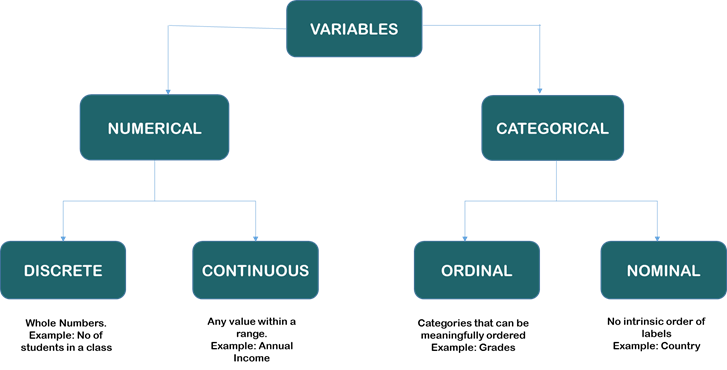

In [9]:
from IPython.display import Image
Image(filename=r'C:\Users\karth\Desktop\ML_Task\1.png')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
 16  IsHoliday_y   421570 non-null  bool   
dtypes: bool(2), float64(10), int64(3), object(2)
mem

In [11]:
data.skew()  # will show you the skewness of each column numerical

Store           0.077763
Dept            0.358223
Weekly_Sales    3.262008
IsHoliday_x     3.359867
Size           -0.325850
Temperature    -0.321404
Fuel_Price     -0.104901
MarkDown1       3.341845
MarkDown2       5.441261
MarkDown3       8.399453
MarkDown4       4.847500
MarkDown5       8.169910
CPI             0.085219
Unemployment    1.183743
IsHoliday_y     3.359867
dtype: float64

In [12]:
data.dtypes #lets have a look at data types of attributes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday_x        bool
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday_y        bool
dtype: object

#### Dependent Variable:

    • Weekly_Sales (Numeric - Continuous)– It is the total sales in units (proprietary data, the units are unknown) of different departments in a store recorded on every Friday for that week from Feb 2010 to November 2012.

#### Independent Variables:

    • Temperature (Numeric - Continuous) – Average temperature recorded for a week of that region in Fahrenheit.
    • Size (Numeric - Discrete) – Number of items in that store.
    • CPI (Numeric - Continuous) – Weekly consumer price index of that region.
    • Unemployment (Numeric - Continuous)- the unemployment rate of that region.
    • IsHoliday**(Logical - Discrete) - Whether the week has a special holiday.
    • Fuel_Price (Numeric - Continuous) - Cost of fuel in the region per gallon.

#### Multilevel Data:

    • Date(Panel) – Date recorded on Fridays of every week.
    • Type (Cross – Sectional) – Type of division as discussed previously.
    • Store (Cross – Sectional) – Store number.
    • Dept (Cross – Sectional) – Departments in Walmart. There are 99 department. Names of all the department are shared in the appendix.

**

    • Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
    • Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
    • Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
    • Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

#### Appendix:

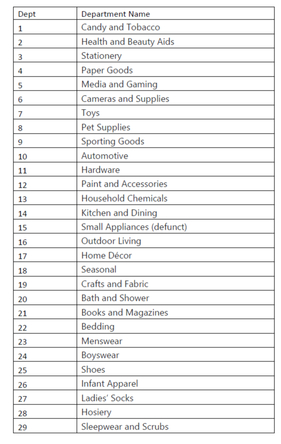

In [13]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\0001.jpg')

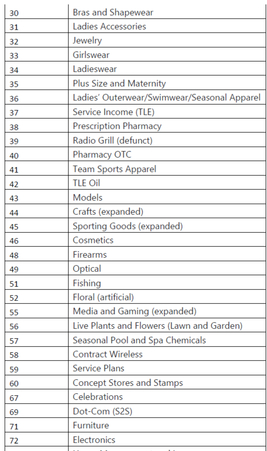

In [14]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\0002.jpg')

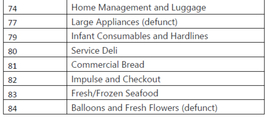

In [15]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\0003.jpg')

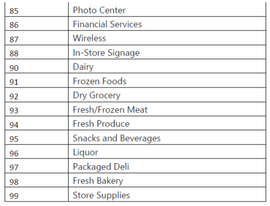

In [16]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\0004.jpg')

In [17]:
# Finding the shape of dataset

print(f"Data contains {data.shape[0]} samples/rows and {data.shape[1]} features/variables/columns")

Data contains 421570 samples/rows and 17 features/variables/columns


#### Step-4 (Non-Graphical Univariate Analysis)

##### To get the count of unique values

The value_counts() method in Pandas returns a series containing the counts of all the unique values in a column.

##### To get the list & number of unique values

The unique() function of pandas returns the list of unique values in the dataset.

#### Preliminary Analysis

In [18]:
"""The value_counts() method in Pandas returns a series containing the counts of all the unique values in a column."""

data['Store'].value_counts(normalize = True) # normalize = True , will return percentage according to frequency

13    0.024845
10    0.024468
4     0.024366
1     0.024300
2     0.024285
24    0.024262
27    0.024255
34    0.024252
20    0.024228
6     0.024221
32    0.024200
19    0.024072
31    0.024058
28    0.023989
41    0.023930
11    0.023868
23    0.023839
14    0.023816
40    0.023761
15    0.023486
8     0.023472
39    0.023431
17    0.023398
18    0.023386
26    0.023375
25    0.023256
7     0.023156
12    0.023021
22    0.022981
45    0.022860
21    0.022729
35    0.022601
29    0.022428
16    0.022400
3     0.021434
5     0.021346
9     0.021033
38    0.017463
37    0.017093
44    0.017005
30    0.016975
42    0.016493
43    0.016014
33    0.015388
36    0.014759
Name: Store, dtype: float64

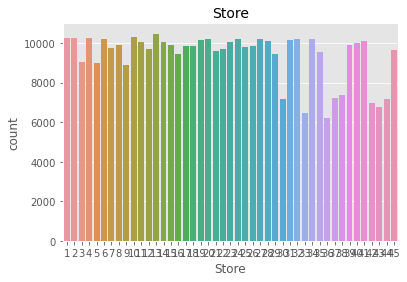

<Figure size 2160x1440 with 0 Axes>

In [19]:
# Let's use countplot() function from seaborn library to visualize Store variable

sns.countplot(data['Store'])
plt.title("Store",fontsize=14)
plt.figure(figsize=(30, 20))
plt.show()

In [20]:
data['Dept'].value_counts(normalize = True)  # normalize = True , will return percentage according to frequency

1     0.015264
10    0.015264
38    0.015264
21    0.015264
67    0.015264
        ...   
78    0.000557
77    0.000356
65    0.000339
39    0.000038
43    0.000028
Name: Dept, Length: 81, dtype: float64

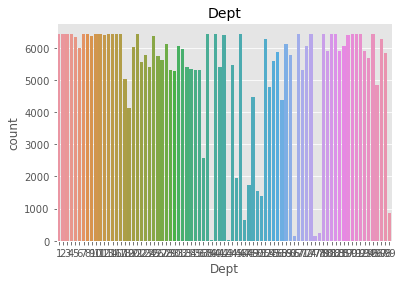

<Figure size 2160x1440 with 0 Axes>

In [21]:
# Let's use countplot() function from seaborn library to visualize Dept variable

sns.countplot(data['Dept'])
plt.title("Dept",fontsize=14)
plt.figure(figsize=(30, 20))
plt.show()

In [22]:
data['IsHoliday_x'].value_counts(normalize = True)  # normalize = True , will return percentage according to frequency

False    0.929642
True     0.070358
Name: IsHoliday_x, dtype: float64

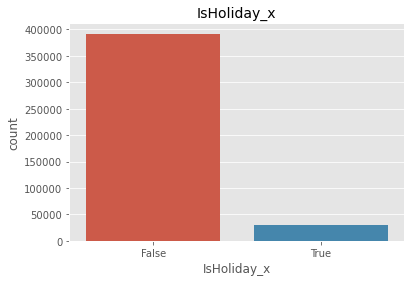

<Figure size 2160x1440 with 0 Axes>

In [23]:
# Let's use countplot() function from seaborn library to visualize IsHoliday_x variable

sns.countplot(data['IsHoliday_x'])
plt.title("IsHoliday_x",fontsize=14)
plt.figure(figsize=(30, 20))
plt.show()

In [24]:
data['IsHoliday_y'].value_counts(normalize = True)  # normalize = True , will return percentage according to frequency

False    0.929642
True     0.070358
Name: IsHoliday_y, dtype: float64

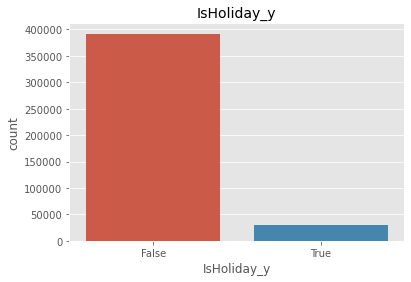

<Figure size 2160x1440 with 0 Axes>

In [25]:
# Let's use countplot() function from seaborn library to visualize IsHoliday_y variable

sns.countplot(data['IsHoliday_y'])
plt.title("IsHoliday_y",fontsize=14)
plt.figure(figsize=(30, 20))
plt.show()

#### As we can see both features 'IsHoliday_x','IsHoliday_y' are same so we can use only one and drop one

In [26]:
# Cleaning holiday columns

data['isHoliday'] = data['IsHoliday_x']

data = data.drop(columns=['IsHoliday_x', 'IsHoliday_y'])

data.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'isHoliday'],
      dtype='object')

In [27]:
data['Type'].value_counts(normalize = True)  # normalize = True , will return percentage according to frequency

A    0.511132
B    0.387824
C    0.101044
Name: Type, dtype: float64

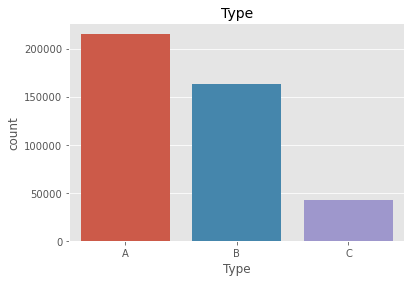

<Figure size 2160x1440 with 0 Axes>

In [28]:
# Let's use countplot() function from seaborn library to visualize Type variable

sns.countplot(data['Type'])
plt.title("Type",fontsize=14)
plt.figure(figsize=(30, 20))
plt.show()

#### let's see how weekly sales look 

<AxesSubplot:title={'center':'Weekly Sales Boxplot'}>

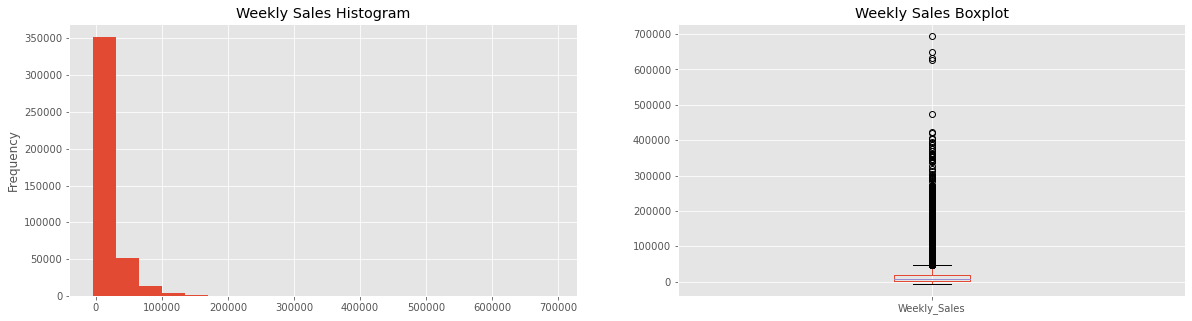

In [29]:
f, ax = plt.subplots(1,2, figsize = (20, 5))

data.Weekly_Sales.plot(kind = "hist", title = "Weekly Sales Histogram", bins = 20, ax = ax[0])
data.Weekly_Sales.plot.box(title = "Weekly Sales Boxplot", ax = ax[1])

#### Step-5 (Filtering based on Conditions)

Datasets can be filtered using different conditions, which can be implemented using logical operators in python. For example, == (double equal to), ≤ (less than or equal to), ≥(greater than or equal to), etc.

#### Step-6 (Data Type Conversion)

Pandas astype() method is used to change the data type of a column. 

to_datetime() method is used to change, particularly to DateTime type.

In [30]:
##--------------Based on box plot--------------------

print("Walmart has", round(data.Weekly_Sales[(data.Weekly_Sales > 100000)].count() / data.shape[0] * 100, 2), 
      "% of the time big sales")
print("----"*16)
print("Walmart has", round(data.Weekly_Sales[(data.Weekly_Sales < 1000)].count() / data.shape[0] * 100, 4), 
      "% of the time low sales")

Walmart has 1.22 % of the time big sales
----------------------------------------------------------------
Walmart has 17.3919 % of the time low sales


In [31]:
##--------------Based on box plot--------------------

data[(data.Weekly_Sales > 500000)]

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,isHoliday
95373,10,72,2010-11-26,693099.36,B,126512,55.33,3.162,NaN,NaN,NaN,NaN,NaN,126.669267,9.003,True
95425,10,72,2011-11-25,630999.19,B,126512,60.68,3.760,174.72,329.0,141630.61,79.00,1009.98,129.836400,7.874,True
337961,35,72,2010-11-26,627962.93,B,103681,46.67,3.039,NaN,NaN,NaN,NaN,NaN,136.689571,8.763,True
338013,35,72,2011-11-25,649770.18,B,103681,47.88,3.492,1333.24,NaN,58563.24,20.97,6386.86,140.421786,8.745,True


#### **As we can see in box plot there where 4 weekly sales more than 500k**         ---Jackpot---

In [32]:
# Checking unique values in each variable

"""The unique() function of pandas returns the list of unique values in the dataset."""

data.nunique()

Store               45
Dept                81
Date               143
Weekly_Sales    359464
Type                 3
Size                40
Temperature       3528
Fuel_Price         892
MarkDown1         2277
MarkDown2         1499
MarkDown3         1662
MarkDown4         1944
MarkDown5         2293
CPI               2145
Unemployment       349
isHoliday            2
dtype: int64

### Checking for null values

In [33]:
# Checking for null values

data.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
isHoliday            0
dtype: int64

<AxesSubplot:>

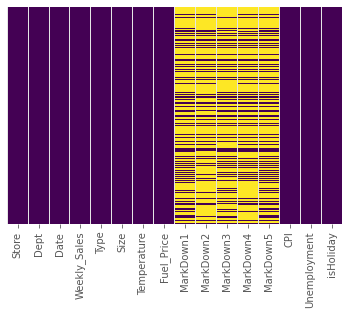

In [34]:
# Visualiation of missing value in heat map

#import missingno as msno
#msno.matrix(data)

#----------OR-----------

sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [35]:
# Checking percentage of null values for each feature/column

null_values_per_variable = 100 * (data.isnull().sum()/data.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending = False)

MarkDown2       73.6
MarkDown4       68.0
MarkDown3       67.5
MarkDown1       64.3
MarkDown5       64.1
isHoliday        0.0
Unemployment     0.0
CPI              0.0
Fuel_Price       0.0
Temperature      0.0
Size             0.0
Type             0.0
Weekly_Sales     0.0
Date             0.0
Dept             0.0
Store            0.0
dtype: float64

**As we can see 'MarkDown' features are mostly missing. We can drop them but as mentioned in problem statement this features can highly influence 'Weekly_Sales' feature**

    MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.

#### Missing value imputation 

**We'll impute the missing values in 'MarkDown' with ' 0 ' as no information about 'MarkDown' is avaialable.**

In [36]:
# Filling empty markdown columns

data['MarkDown1'] = data['MarkDown1'].fillna(0)
data['MarkDown2'] = data['MarkDown2'].fillna(0)
data['MarkDown3'] = data['MarkDown3'].fillna(0)
data['MarkDown4'] = data['MarkDown4'].fillna(0)
data['MarkDown5'] = data['MarkDown5'].fillna(0)

#--------------OR--------------------

#data = data.drop(columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4','MarkDown5'],axis = 1)
#data.columns

In [37]:
data.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
isHoliday       0
dtype: int64

In [38]:
# Removal of duplicate rows

print(f"Before removing duplicate rows {data.shape[0]} and columns {data.shape[1]}")

data = data.drop_duplicates()

print(f"\nAfter removing duplicate rows {data.shape[0]} and columns {data.shape[1]}")

Before removing duplicate rows 421570 and columns 16

After removing duplicate rows 421570 and columns 16


#### **We can see that there are no duplicate rows because data is time series**

In [39]:
data.head().append(data.tail()) #show the first and last 5 rows.

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,isHoliday
0,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,A,151315,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,A,151315,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,A,151315,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,A,151315,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False
421565,45,98,2012-09-28,508.37,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False
421566,45,98,2012-10-05,628.10,B,118221,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,False
421567,45,98,2012-10-12,1061.02,B,118221,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,False
421568,45,98,2012-10-19,760.01,B,118221,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,False
421569,45,98,2012-10-26,1076.80,B,118221,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False


In [40]:
data.shape

(421570, 16)

### Analyzing each variable and their relationships

##### For each feature type we will perform two types of analysis

##### Univariate: Analyze one feature at a time

##### Bivariate: Analyze two features at a time (Relation between each input feature and target feature)

#### Step-7 (Graphical Univariate Analysis)

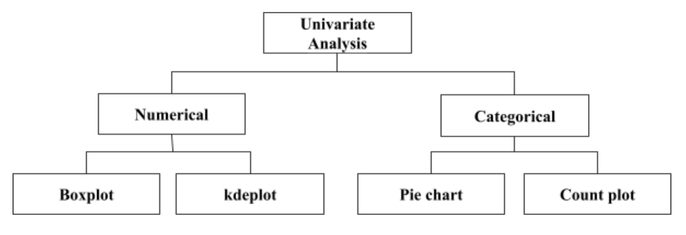

In [41]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\200.jpg')

#### Box Plots:

A Box Plot is the visual representation of the statistical summary of a given data set.

The Summary includes:

    Minimum
    First Quartile
    Median (Second Quartile)
    Third Quartile
    Maximum

It is also used to identify the outliers in the dataset.

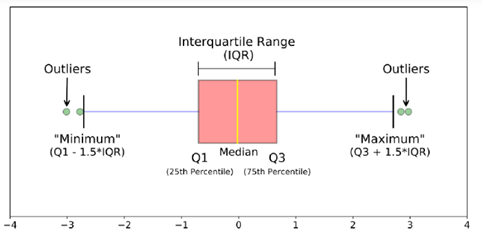

In [42]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\3.png')

#### KDE Plot (Density Plot)

    KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable. 
    It depicts the probability density at different values in a continuous variable. 
    We can also plot a single graph for multiple samples which helps in more efficient data visualization.

#### Pie chart

    Pie charts are generally used to show percentage or proportional data and usually the percentage represented by each category is provided next to the corresponding slice of pie. 
    Pie charts are good for displaying data for around 6 categories or fewer.

#### Count Plots

    A count plot can be thought of as a histogram across a categorical, instead of numeric, variable. It is used to find the frequency of each category.


#### Histogram:

    Histograms are one of the most common graphs used to display numeric data. 
    Histograms two important things we can learn from a histogram:

    distribution of the data — Whether the data is normally distributed or if it’s skewed (to the left or right)
    To identify outliers — Extremely low or high values that do not fall near any other data points.

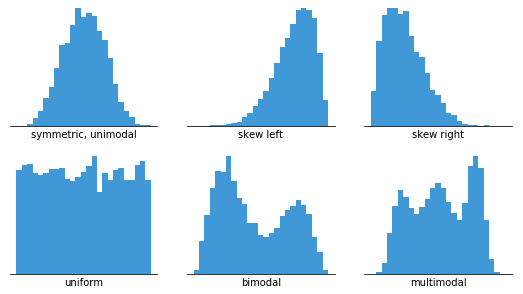

In [43]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\2.png')

#### Step-8 (Graphical Bivariate Analysis)

    Bi-variate Analysis finds out the relationship between two variables. 
    Here, we look for association and dissociation between variables at a pre-defined significance level. 
    We can perform bi-variate analysis for any combination of categorical and continuous variables. 
    The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous. 
    Different methods are used to tackle these combinations during the analysis process.

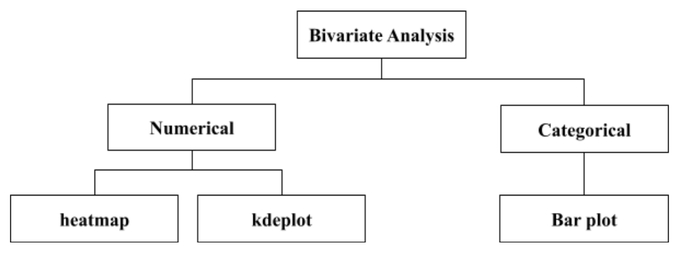

In [44]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\100.jpg')

#### heatmap

    heatmap is used to find the correlation 
    A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors. 
    The seaborn python package allows the creation of annotated heatmaps.

#### Bar plot

    Histograms are used to show distributions of variables while bar charts are used to compare variables. Histograms plot quantitative data with ranges of the data grouped into bins or intervals while bar charts plot categorical data.

In [45]:
# Displaying column names

print(data.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'isHoliday'],
      dtype='object')


In [46]:
data.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
isHoliday          bool
dtype: object

##### Segregating catogorical and numerical variables

In [47]:
#cat_cols = data.loc[:,data.dtypes==np.object] # getting catogorical columns from dataframe like this
#cat_cols
#------------------------------------------------------OR-------------------------------------------------------------
"""
print("Continuous Variables","\n")
num_cols = data.describe().columns
print(num_cols)
"""
"""
print("Categorical Variables","\n")
cat_cols = data.describe(include=[object]).columns
print(cat_cols)
"""
#------------------------------------------------------OR-------------------------------------------------------------

cat_cols = ['Type','isHoliday','Date']

In [48]:
num_cols = [c for c in data if c not in cat_cols] # getting numeric columns from dataframe like this
print(num_cols)

['Store', 'Dept', 'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']


### Univariate Analysis of categorical features - countplot

A way of looking at the counts of each of the catogories is countplots.

These are similar to barplots with the width of the bars representing the count of the category in the variable

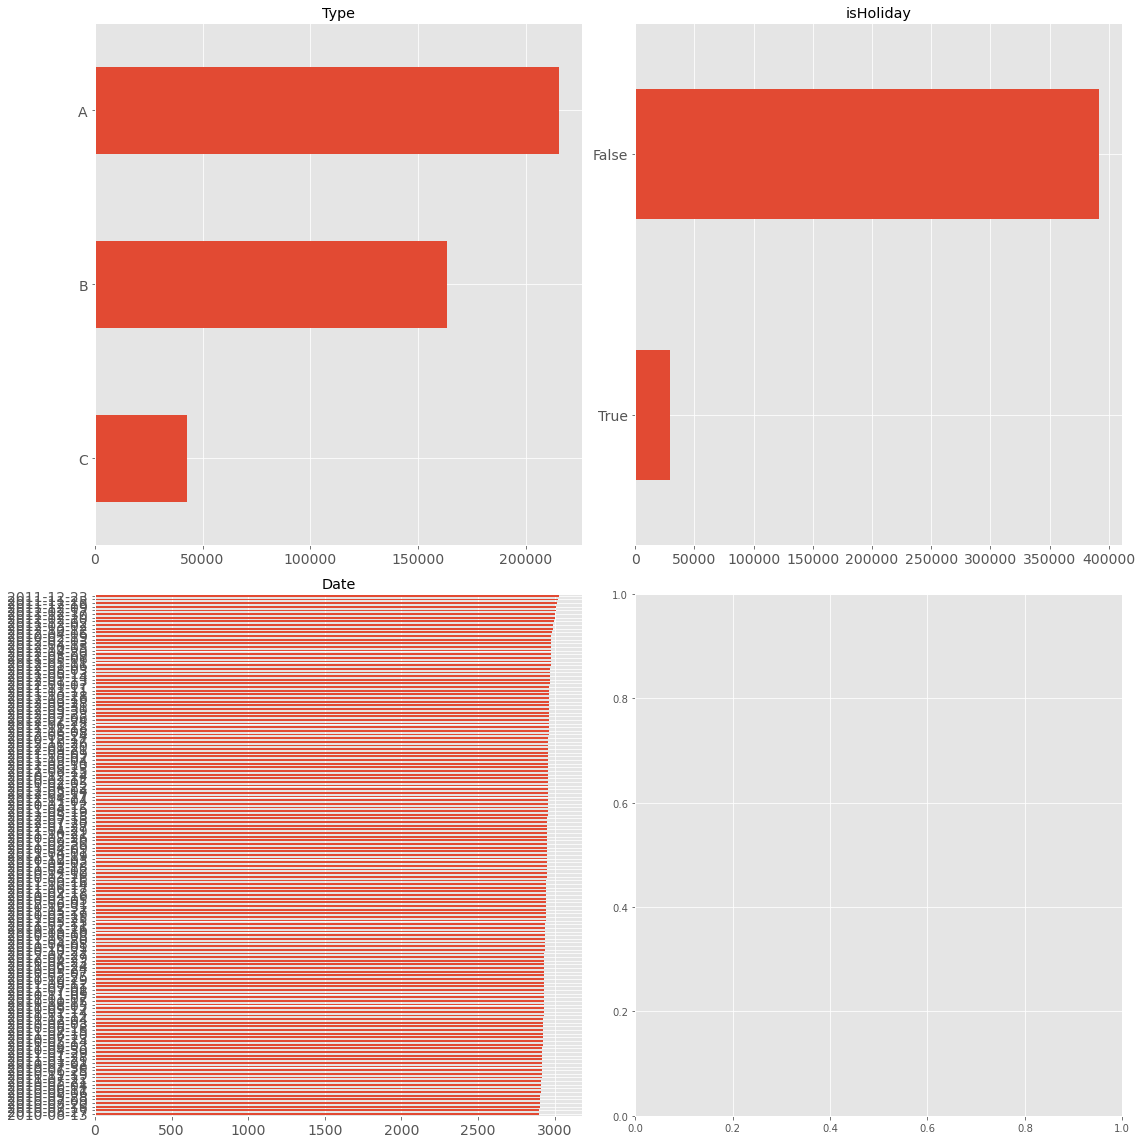

In [49]:
fig, axes = plt.subplots(2, 2, figsize=(16, 16)) #total 4 subplots that's why 2*2
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(data[cat_cols]):
    _ = data[c].value_counts()[::-1].plot(kind = 'barh', ax=axes[i], title=c, fontsize=14)
_ = plt.tight_layout()

#### **Univariate Analysis - Pie Charts.**

Pie Charts can be useful in seeing the proportion of samples, that fall into each category of a categorical variable. For each of the categorical variables we will make a pie chart.

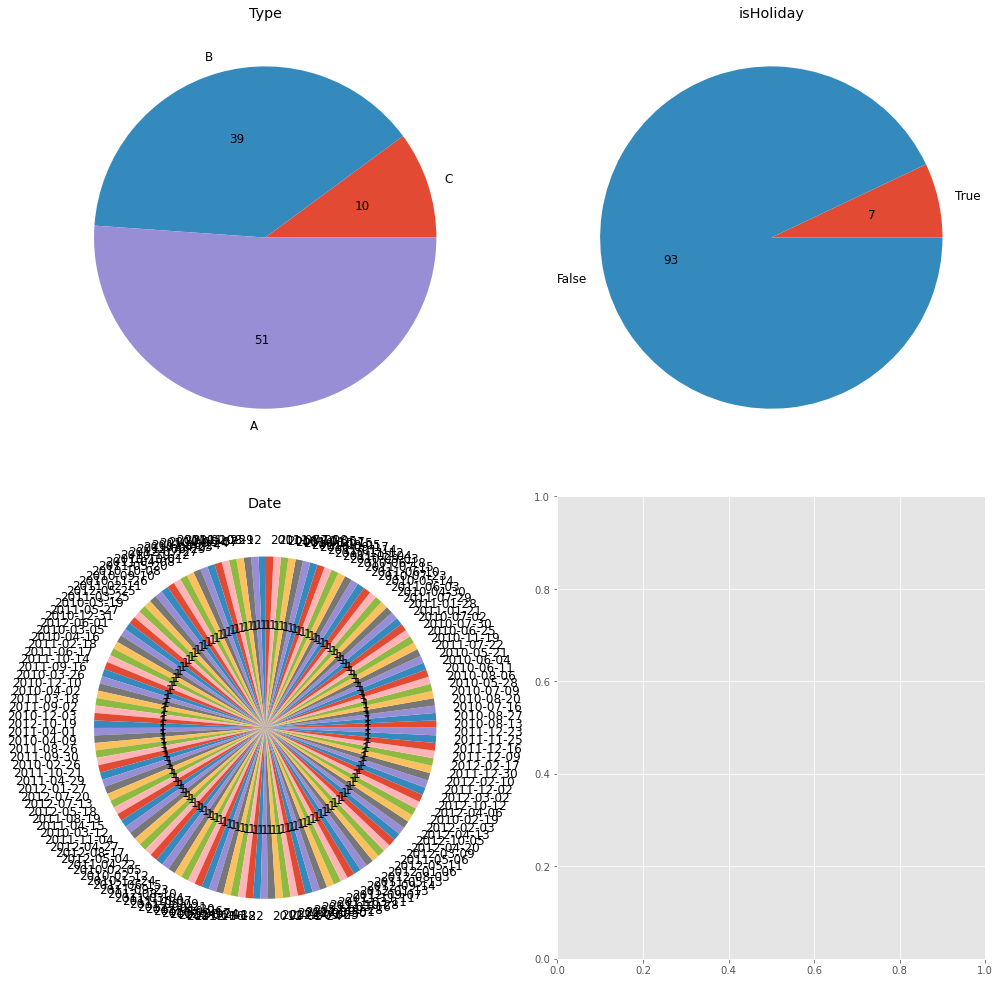

In [50]:
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(data[cat_cols]):
    _ = data[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=c, autopct='%.0f', fontsize=12)
    _ = axes[i].set_ylabel('')
    
_ = plt.tight_layout()

#### Bivariate Analysis: Relationship between catogorical features with target

#### Univariate Analysis for continuous variables

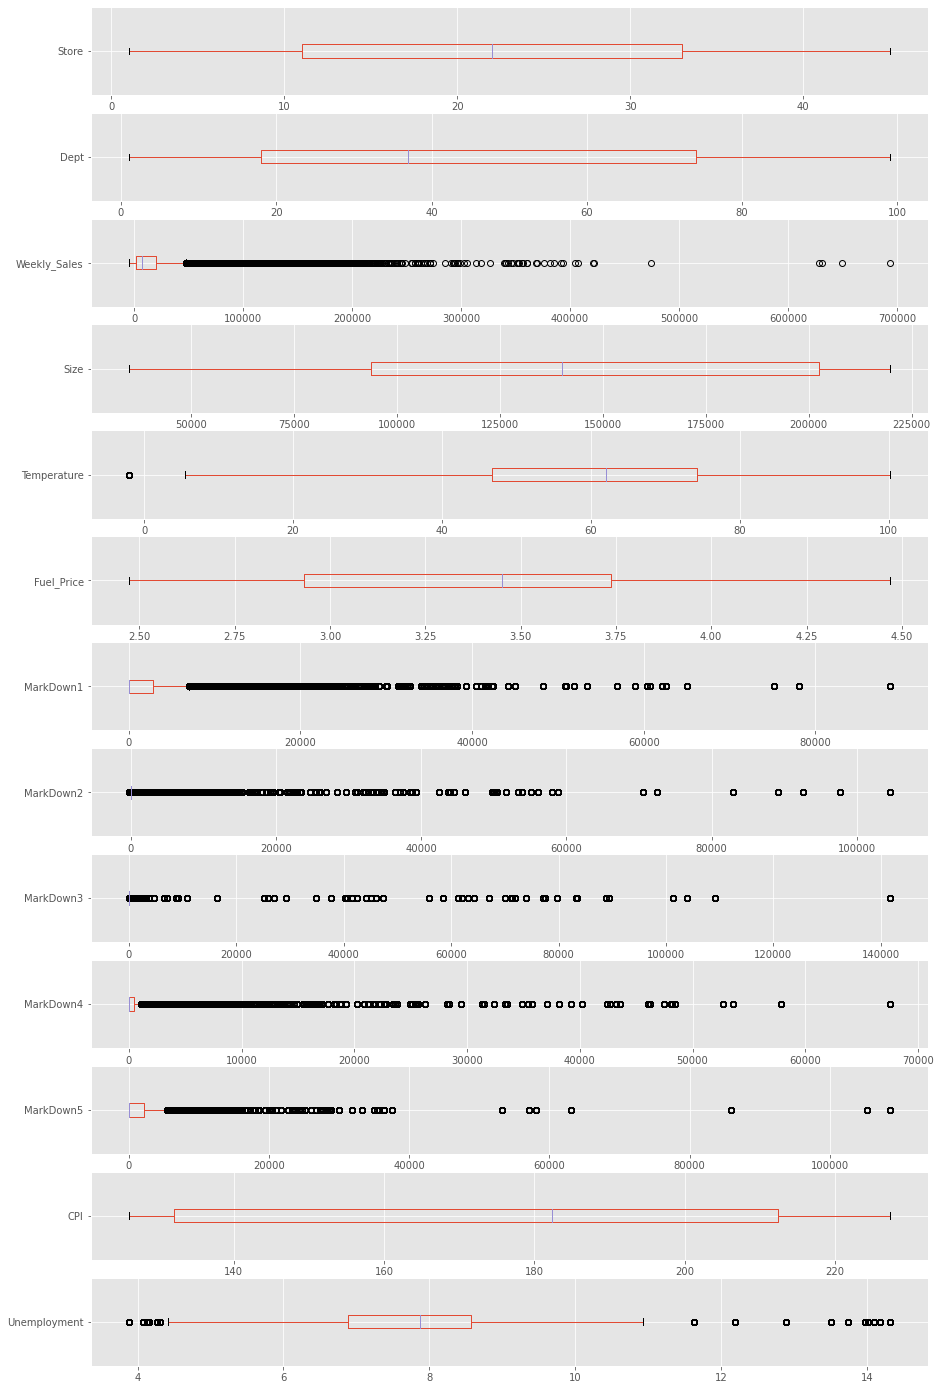

In [51]:
## Using Boxplots

fig, axes = plt.subplots(13,1, figsize=(15,25))
for i, c in enumerate(num_cols):
    _ = data[[c]].boxplot(ax=axes[i], vert=False)

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

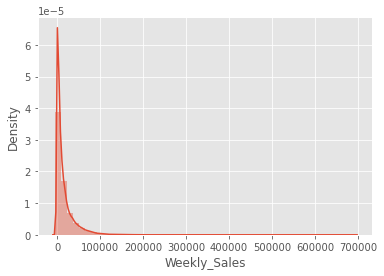

In [52]:
import seaborn as sns

sns.distplot(data['Weekly_Sales']) #sns.distplot(data['Weekly_Sales'].dropna())

#### Gaussian Distributed

Text(0.5, 1.0, 'Weekly_Sales')

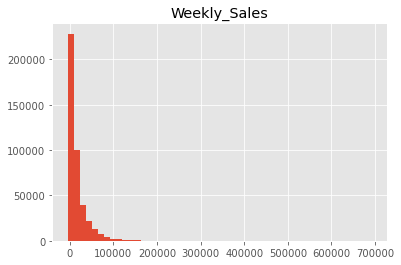

In [53]:
figure=data.Weekly_Sales.hist(bins=50)
figure.set_title('Weekly_Sales')

In [54]:
data['Weekly_Sales'].describe()

count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

#### Feature Are Skewed We Use the below Technique

In [55]:
#### Lets compute the Interquantile range to calculate the boundaries

IQR = data.Weekly_Sales.quantile(0.75) - data.Weekly_Sales.quantile(0.25)

In [56]:
lower_bridge = data['Weekly_Sales'].quantile(0.25) - (IQR * 1.5) 
upper_bridge = data['Weekly_Sales'].quantile(0.75) + (IQR * 1.5)
print(lower_bridge)
print(upper_bridge)

-25109.653749999998
47395.15625


In [57]:
#### Extreme outliers

lower_bridge = data['Weekly_Sales'].quantile(0.25) - (IQR * 3)
upper_bridge = data['Weekly_Sales'].quantile(0.75) + (IQR * 3)
print(lower_bridge)
print(upper_bridge)

-52298.9575
74584.45999999999


In [58]:
data1 = data.copy()

In [59]:
data1.loc[data1['Weekly_Sales'] >= 74584,'Weekly_Sales'] = 74584

Text(0.5, 1.0, 'Weekly_Sales')

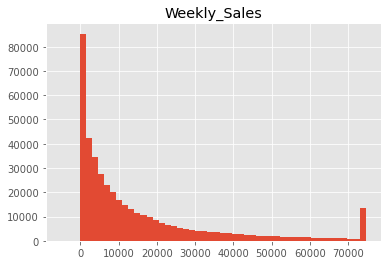

In [60]:
figure=data1.Weekly_Sales.hist(bins=50)
figure.set_title('Weekly_Sales')

#### -------------------OR---------------------------

### Outliers

In [61]:
# Outliers can be removed by using z-score and IQR formula

## Code to remove outliers in our dataset
## After removing the outliers the few rows gets deleted

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

#print(IQR)

#print(data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))

data1 = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data1.shape

#------------------------------------------------------------------------------------------------

#from scipy import stats
#import numpy as np

#z = np.abs(stats.zscore(data))
#print(z)

# Setting threshold value. If the datapoint is more than mentioned threshold value the we remove them
#threshold = 3
#print(np.where(z > 3))

#data1 = data[(z < 3).all(axis=1)]
#data1.shape

(231545, 16)

#### What to do if we have skewed data?

##### We need to do any of the thing mentioned below

    LOG TRANSFORMATION
    
    SQUARE ROOT TRASFORMATION
    
    BOX-COX TRANSFORMATION
    
##### https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45

#### Univariate Analysis for continuous variables

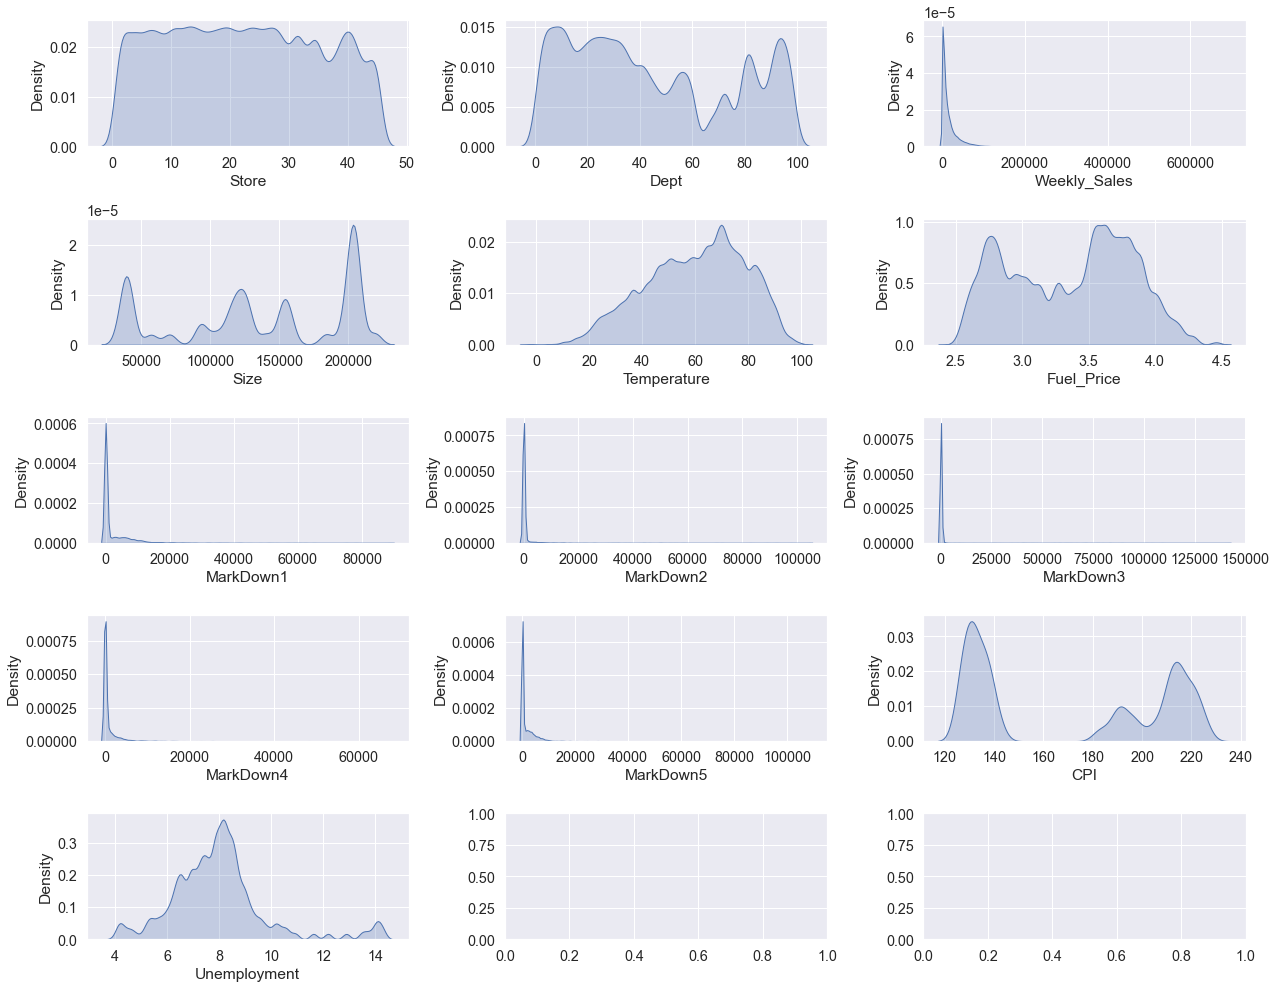

In [62]:
## Density plot

# A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset,
# analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

sns.set(font_scale = 1.3)
fig, axes = plt.subplots(5, 3, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
    plot = sns.kdeplot(data=data, x=c, ax=axes[i], fill=True)
plt.tight_layout()

### NOTE:

#### **The features of interest are normally distributed as seen above. Among the above for the one’s which were not normally distributed are transformed using log transformation.**

Text(0.5, 1.0, 'Temperature')

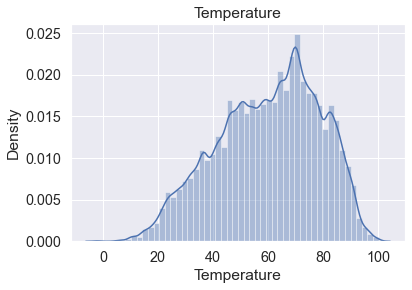

In [63]:
figure = sns.distplot(data['Temperature']) 
figure.set_title('Temperature')

Text(0.5, 1.0, 'Unemployment')

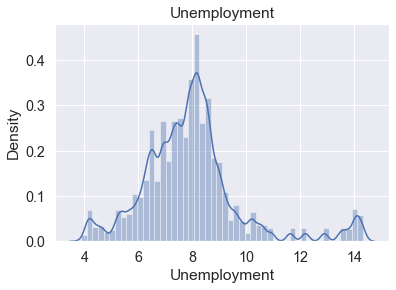

In [64]:
figure = sns.distplot(data['Unemployment']) 
figure.set_title('Unemployment')

Text(0.5, 1.0, 'Fuel Price')

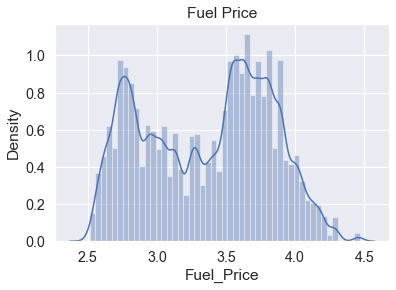

In [65]:
figure = sns.distplot(data['Fuel_Price']) 
figure.set_title('Fuel Price')

### Applying log transformation for 'Fuel_Price' feature

Text(0.5, 1.0, 'Log Fuel Price')

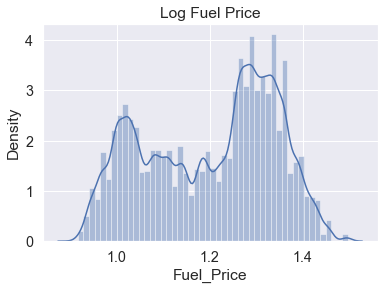

In [66]:
log_fuel = np.log(data['Fuel_Price'])
figure = sns.distplot(log_fuel) 
figure.set_title('Log Fuel Price')

Text(0.5, 1.0, 'Weekly Price')

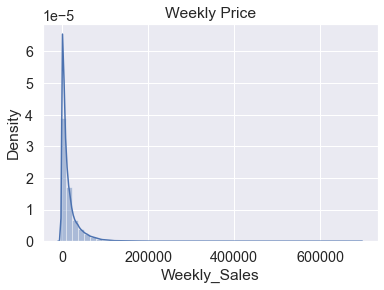

In [67]:
figure = sns.distplot(data['Weekly_Sales']) 
figure.set_title('Weekly Price')

### Applying log transformation for 'Weekly_Price' feature

In [68]:
#log_weekly_sales = np.log(data['Weekly_Sales'])
#figure = sns.distplot(log_weekly_sales) 
#figure.set_title('Log Weekly Sales')

#### Bivariate Analysis: Relationship between numerical and target variable

#### Bivariate Analysis - Correlation Heatmaps

Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

##### .00-.19 “very weak”
##### .20-.39 “weak”
##### .40-.59 “moderate”
##### .60-.79 “strong”
##### .80-1.0 “very strong”

In [69]:
data.corr()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,isHoliday
Store,1.000000,0.024004,-0.085195,-0.182881,-0.050097,0.065290,-0.059844,-0.033829,-0.020331,-0.042724,-0.012452,-0.211088,0.208552,-0.000548
Dept,0.024004,1.000000,0.148032,-0.002966,0.004437,0.003572,0.001494,0.000587,0.001475,0.001937,0.002668,-0.007477,0.007837,0.000916
Weekly_Sales,-0.085195,0.148032,1.000000,0.243828,-0.002312,-0.000120,0.047172,0.020716,0.038562,0.037467,0.050465,-0.020921,-0.025864,0.012774
Size,-0.182881,-0.002966,0.243828,1.000000,-0.058313,0.003361,0.169788,0.078372,0.033641,0.127334,0.153011,-0.003314,-0.068238,0.000593
Temperature,-0.050097,0.004437,-0.002312,-0.058313,1.000000,0.143859,-0.026415,-0.179672,-0.056026,-0.050281,-0.014752,0.182112,0.096730,-0.155949
Fuel_Price,0.065290,0.003572,-0.000120,0.003361,0.143859,1.000000,0.297056,0.029153,0.018615,0.166622,0.215420,-0.164210,-0.033853,-0.078281
MarkDown1,-0.059844,0.001494,0.047172,0.169788,-0.026415,0.297056,1.000000,0.174868,-0.014411,0.838904,0.415050,0.010915,-0.105168,-0.003521
MarkDown2,-0.033829,0.000587,0.020716,0.078372,-0.179672,0.029153,0.174868,1.000000,-0.006080,0.113250,0.131735,-0.003554,-0.041427,0.207604
MarkDown3,-0.020331,0.001475,0.038562,0.033641,-0.056026,0.018615,-0.014411,-0.006080,1.000000,-0.012020,0.042471,-0.005839,-0.018078,0.266471
MarkDown4,-0.042724,0.001937,0.037467,0.127334,-0.050281,0.166622,0.838904,0.113250,-0.012020,1.000000,0.303370,-0.002047,-0.076513,0.011565


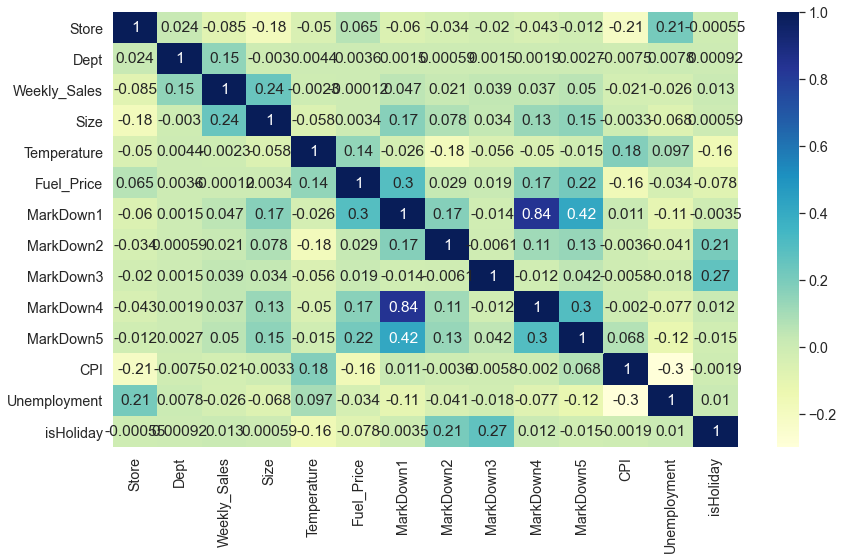

In [70]:
plt.figure(figsize=(14, 8))
_ = sns.heatmap(data.corr(), annot=True,cmap='YlGnBu') #cmap="RdYlGn" #cmap=plt.cm.CMRmap_r

In [71]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [72]:
# Calling function
corr_features = correlation(data, 0.7)

# Checking how many features are having high correlation greater than 0.7
print("Number of features which are having high correlation greater than 0.7 are: ",len(set(corr_features)))

Number of features which are having high correlation greater than 0.7 are:  1


In [73]:
# Checking what are the feature names which are having high correlation greater than 0.7
print("Feature names which are having high correlation greater than 0.7 are: ",corr_features)

Feature names which are having high correlation greater than 0.7 are:  {'MarkDown4'}


In [74]:
# Dropping these features from the dataset
#data.drop(corr_features,axis=1)

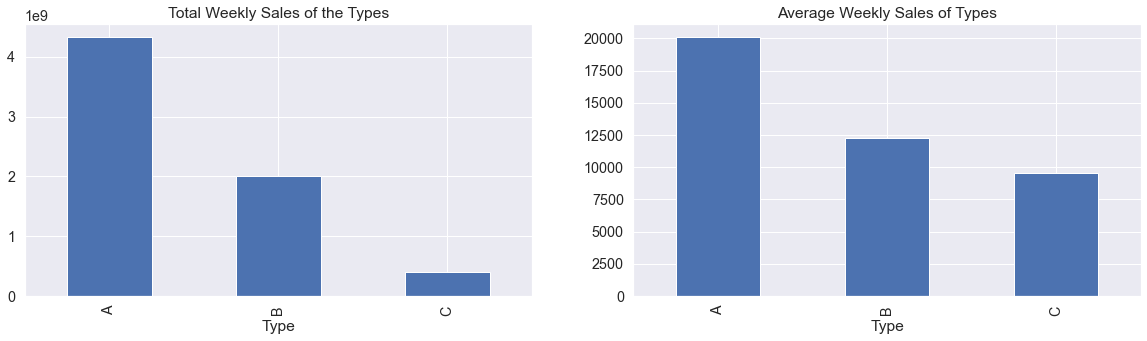

In [75]:
f, ax = plt.subplots(1,2, figsize = (20, 5))

data.groupby("Type")["Weekly_Sales"].sum().plot(kind = "bar",title = "Total Weekly Sales of the Types", ax = ax[0])

data.groupby("Type")["Weekly_Sales"].mean().plot(kind = "bar",title = "Average Weekly Sales of Types", ax = ax[1])

plt.subplots_adjust(hspace = 0.3)
plt.show()

#### Walmart runs three types of stores based on number items namely hypermarkets, discount department stores, and grocery stores.

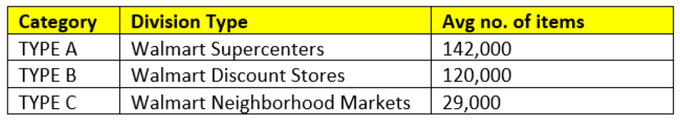

In [76]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\0005.jpg')

In [77]:
data.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
isHoliday          bool
dtype: object

##### **As we can see "Date" is in object format. Lets convert to datetime format**

In [78]:
data.Date = data.Date.astype("datetime64[ns]")

In [79]:
data.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
Type                    object
Size                     int64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
isHoliday                 bool
dtype: object

**Now lets split "Date" variable into seperate features for our analysis with "MarkDown" variable**

### Feature Engineering

In [80]:
import calendar

data["Month"] = data.Date.dt.month

data["Year"] = data.Date.dt.year

data["Day"] = data.Date.dt.day

data['Week_Number'] = data['Date'].dt.week

data['Quarter'] = data['Date'].dt.quarter

#data['Month'] = data['Date'].dt.month.apply(lambda x: calendar.month_abbr[x])

#The day of the week with Monday=0, Sunday=6.
#data['Day_of_week'] = data['Date'].dt.dayofweek

In [81]:
# Creating a custom season dictionary to identify the season in each month
seasons_dict = {
    1:"Winter",
    2:"Winter",
    3:"Spring",
    4:"Spring",
    5:"Spring",
    6:"Summer",
    7:"Summer",
    8:"Summer",
    9:"Fall",
    10:"Fall",
    11:"Fall",
    12:"Winter"
}
data['Season'] = (data['Date'].apply(lambda dt: (dt.month%12 + 3)//3)).map(seasons_dict)

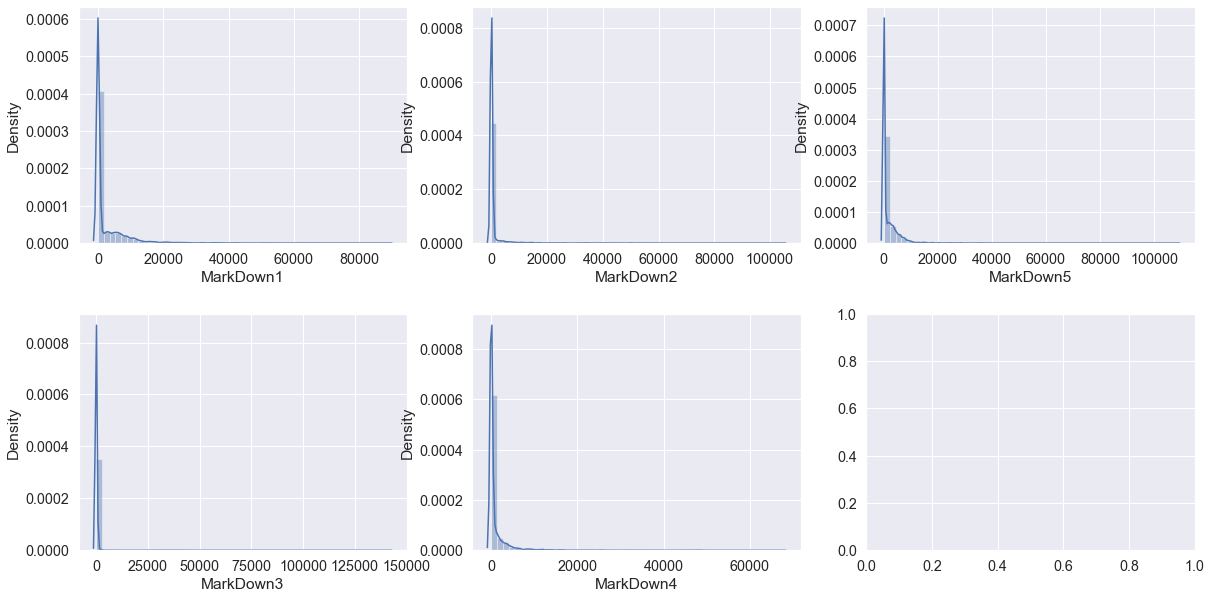

In [82]:
f, ax = plt.subplots(2,3, figsize = (20, 10))

figure = sns.distplot(data['MarkDown1'],ax = ax[0,0])
figure = sns.distplot(data['MarkDown2'],ax = ax[0,1])
figure = sns.distplot(data['MarkDown3'],ax = ax[1,0])
figure = sns.distplot(data['MarkDown4'],ax = ax[1,1])
figure = sns.distplot(data['MarkDown5'],ax = ax[0,2])

plt.subplots_adjust(hspace = 0.3)
plt.show()

### Aggregating all five markdown features into single feature

In [83]:
data['MarkDown'] = data['MarkDown1'] + data['MarkDown2'] + data['MarkDown3'] + data['MarkDown4'] + data['MarkDown5']

data = data.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])

#data['MarkDown*Weekly_Sales_Lag'] = master_df_new_var['MarkDown']*master_df_new_var['Weekly_Sales_Lag']

In [84]:
data['MarkDown'].value_counts()

0.00         270138
45669.68         75
28708.15         75
7657.84          75
114565.27        75
              ...  
1388.08          42
2123.84          42
1209.31          42
1866.40          42
3655.62          42
Name: MarkDown, Length: 2296, dtype: int64

In [85]:
data.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
Type            0
Size            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
isHoliday       0
Month           0
Year            0
Day             0
Week_Number     0
Quarter         0
Season          0
MarkDown        0
dtype: int64

Text(0.5, 1.0, 'MarkDown')

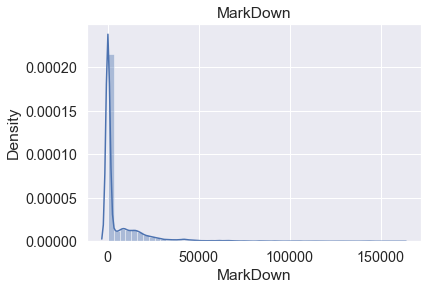

In [86]:
figure = sns.distplot(data['MarkDown'])
figure.set_title('MarkDown')

In [87]:
#log_MarkDown = np.log(data['MarkDown'])
#figure = sns.distplot(log_MarkDown) 
#figure.set_title('Log MarkDown')

In [88]:
data.head().append(data.tail())

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,isHoliday,Month,Year,Day,Week_Number,Quarter,Season,MarkDown
0,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,False,2,2010,5,5,1,Winter,0.00
1,1,1,2010-02-12,46039.49,A,151315,38.51,2.548,211.242170,8.106,True,2,2010,12,6,1,Winter,0.00
2,1,1,2010-02-19,41595.55,A,151315,39.93,2.514,211.289143,8.106,False,2,2010,19,7,1,Winter,0.00
3,1,1,2010-02-26,19403.54,A,151315,46.63,2.561,211.319643,8.106,False,2,2010,26,8,1,Winter,0.00
4,1,1,2010-03-05,21827.90,A,151315,46.50,2.625,211.350143,8.106,False,3,2010,5,9,1,Winter,0.00
421565,45,98,2012-09-28,508.37,B,118221,64.88,3.997,192.013558,8.684,False,9,2012,28,39,3,Spring,9468.01
421566,45,98,2012-10-05,628.10,B,118221,64.89,3.985,192.170412,8.667,False,10,2012,5,40,4,Spring,9659.00
421567,45,98,2012-10-12,1061.02,B,118221,54.47,4.000,192.327265,8.667,False,10,2012,12,41,4,Spring,6554.03
421568,45,98,2012-10-19,760.01,B,118221,56.47,3.969,192.330854,8.667,False,10,2012,19,42,4,Spring,3982.42
421569,45,98,2012-10-26,1076.80,B,118221,58.85,3.882,192.308899,8.667,False,10,2012,26,43,4,Spring,5247.26


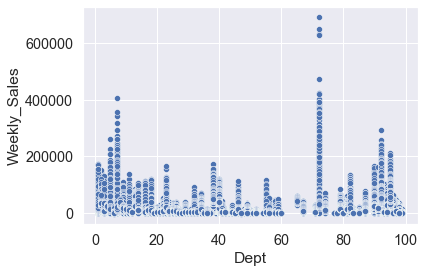

In [89]:
## Seeing distibution of Weekly Sales for every department

sns.scatterplot(x="Dept", y="Weekly_Sales", data=data)
plt.show()

### Bivariate analysis for categorical and continuous variable using factorplot

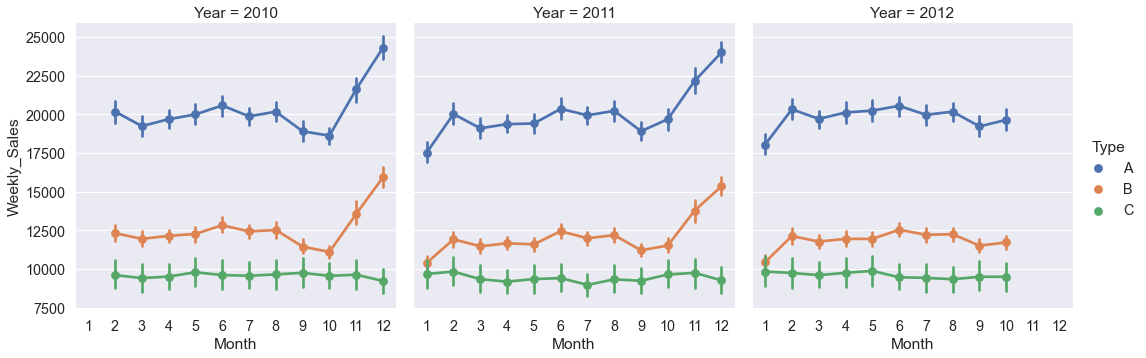

In [90]:
### Sales trend over the months 

# sns.factorplot(data=None, x=None, y=None, col=None, hue=None,  row=None)

#x, y : This parameter take names of variables in data, Inputs for plotting long-form data.
#hue : (optional)This parameter take column name for colour encoding
#data : This parameter take DataFrame, Long-form (tidy) dataset for plotting. Each column should correspond to a variable, and each row should correspond to an observation.
#row, col : (optional) This parameter take names of variables in data, Categorical variables that will determine the faceting of the grid.

sns.factorplot(data = data, x ="Month", y = "Weekly_Sales", 
               col = "Year", hue = "Type")

<AxesSubplot:xlabel='Year', ylabel='Weekly_Sales'>

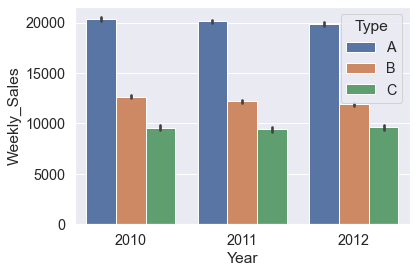

In [91]:
sns.barplot(x="Year", y="Weekly_Sales", hue="Type", data=data)

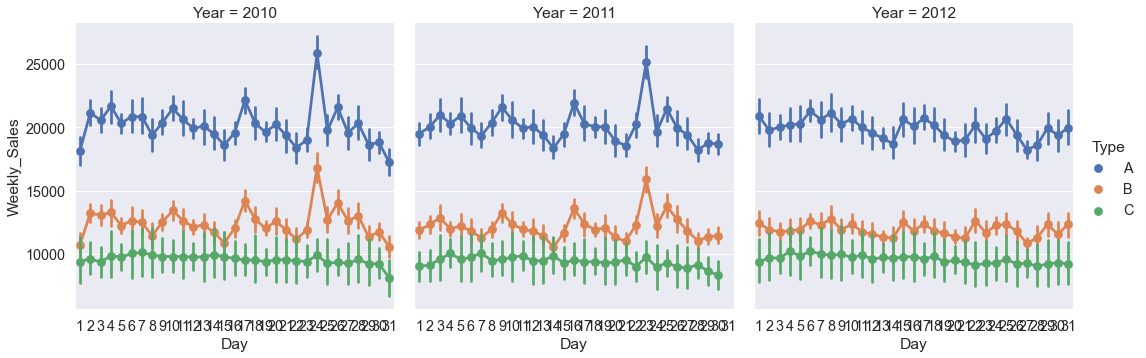

In [92]:
# Plotting factorplot() between day wise weekly sales 

sns.factorplot(data = data, x = "Day", y = "Weekly_Sales",
               col = "Year", hue = "Type")

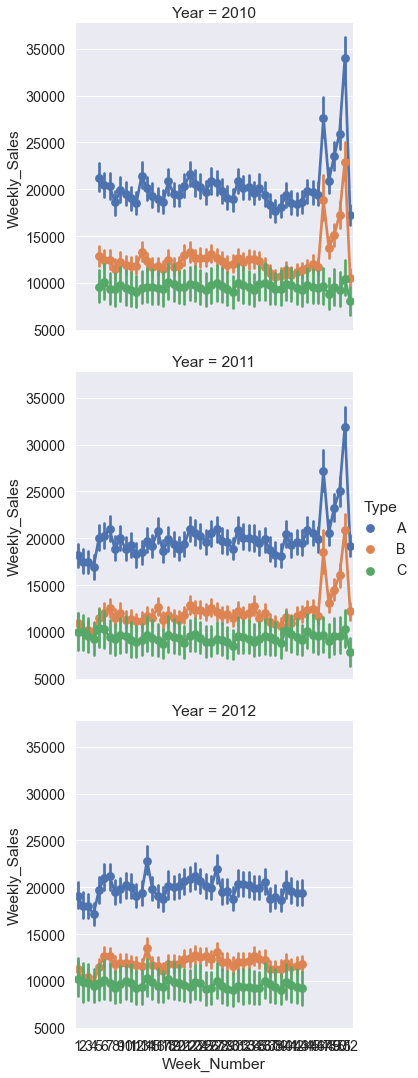

In [93]:
# Plotting factorplot() between weekly sales and Week Number

sns.factorplot(data = data, x = "Week_Number", y = "Weekly_Sales",
               row = "Year", hue = "Type")

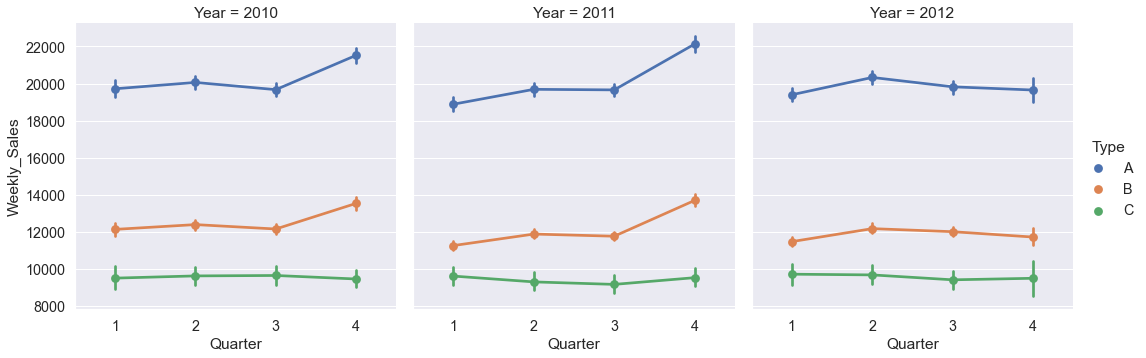

In [94]:
# Plotting factorplot() between Quaterly weekly sales

sns.factorplot(data = data, x = "Quarter", y = "Weekly_Sales",
               col = "Year", hue = "Type")

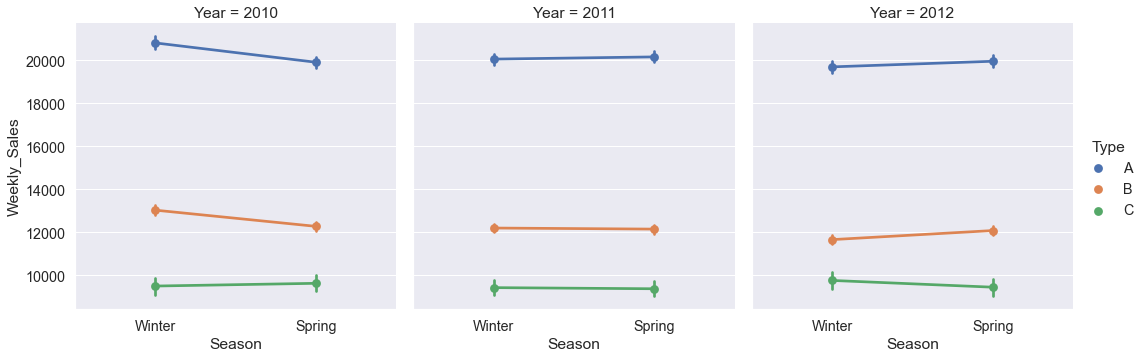

In [95]:
# Plotting factorplot() between Season wise weekly sales  

sns.factorplot(data = data, x = "Season", y = "Weekly_Sales",
               col = "Year", hue = "Type")

**As we can observe from all above plots Type A has more sales and Type C sales are always constant either increase nor decrease**

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   Type          421570 non-null  object        
 5   Size          421570 non-null  int64         
 6   Temperature   421570 non-null  float64       
 7   Fuel_Price    421570 non-null  float64       
 8   CPI           421570 non-null  float64       
 9   Unemployment  421570 non-null  float64       
 10  isHoliday     421570 non-null  bool          
 11  Month         421570 non-null  int64         
 12  Year          421570 non-null  int64         
 13  Day           421570 non-null  int64         
 14  Week_Number   421570 non-null  int64         
 15  Quarter       421

### Let's convert categorical features into numerical (This should be done if we think these features are important for our model)

In [97]:
data['Type'].value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

In [98]:
data['isHoliday'].value_counts()

False    391909
True      29661
Name: isHoliday, dtype: int64

In [99]:
# We should represent our IsHoliday column in numeric values. So, let's change IsHoliday column with ‘False’ to be 0 and ‘True’ to be 1.

def paron(x):
    if x == False:
        return 0
    return 1

#Train.csv
actualScore = data['isHoliday']
posiveNegave = actualScore.map(paron)
data['isHoliday'] = posiveNegave
print("Shape of data: ", data.shape)
data['isHoliday'].head()

Shape of data:  (421570, 18)


0    0
1    1
2    0
3    0
4    0
Name: isHoliday, dtype: int64

In [100]:
data['Season'].value_counts()

Spring    217600
Winter    203970
Name: Season, dtype: int64

### one hot encoding

In [101]:
data= pd.get_dummies(data,columns = ['Type','Season'])
data.head()

,Store,Dept,Date,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,isHoliday,...,Year,Day,Week_Number,Quarter,MarkDown,Type_A,Type_B,Type_C,Season_Spring,Season_Winter
0,1,1,2010-02-05,24924.50,151315,42.31,2.572,211.096358,8.106,0,...,2010,5,5,1,0.0,1,0,0,0,1
1,1,1,2010-02-12,46039.49,151315,38.51,2.548,211.242170,8.106,1,...,2010,12,6,1,0.0,1,0,0,0,1
2,1,1,2010-02-19,41595.55,151315,39.93,2.514,211.289143,8.106,0,...,2010,19,7,1,0.0,1,0,0,0,1
3,1,1,2010-02-26,19403.54,151315,46.63,2.561,211.319643,8.106,0,...,2010,26,8,1,0.0,1,0,0,0,1
4,1,1,2010-03-05,21827.90,151315,46.50,2.625,211.350143,8.106,0,...,2010,5,9,1,0.0,1,0,0,0,1


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Store          421570 non-null  int64         
 1   Dept           421570 non-null  int64         
 2   Date           421570 non-null  datetime64[ns]
 3   Weekly_Sales   421570 non-null  float64       
 4   Size           421570 non-null  int64         
 5   Temperature    421570 non-null  float64       
 6   Fuel_Price     421570 non-null  float64       
 7   CPI            421570 non-null  float64       
 8   Unemployment   421570 non-null  float64       
 9   isHoliday      421570 non-null  int64         
 10  Month          421570 non-null  int64         
 11  Year           421570 non-null  int64         
 12  Day            421570 non-null  int64         
 13  Week_Number    421570 non-null  int64         
 14  Quarter        421570 non-null  int64         
 15  

In [103]:
# I will use for prophet modeling
prophet_data = data.copy()

In [104]:
prophet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Store          421570 non-null  int64         
 1   Dept           421570 non-null  int64         
 2   Date           421570 non-null  datetime64[ns]
 3   Weekly_Sales   421570 non-null  float64       
 4   Size           421570 non-null  int64         
 5   Temperature    421570 non-null  float64       
 6   Fuel_Price     421570 non-null  float64       
 7   CPI            421570 non-null  float64       
 8   Unemployment   421570 non-null  float64       
 9   isHoliday      421570 non-null  int64         
 10  Month          421570 non-null  int64         
 11  Year           421570 non-null  int64         
 12  Day            421570 non-null  int64         
 13  Week_Number    421570 non-null  int64         
 14  Quarter        421570 non-null  int64         
 15  

In [105]:
#prophet_data.to_csv('C://Users//karth//Desktop//Timeseries_Task//demo.csv', encoding='utf-8' ,index=False)

### Lets go ahead with forecasting.

### ARIMA Forcasting

In [106]:
data = data.set_index("Date").resample("W").mean() # set the index to date

data.head()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,isHoliday,Month,Year,Day,Week_Number,Quarter,MarkDown,Type_A,Type_B,Type_C,Season_Spring,Season_Winter
Date,,,,,,,,,,,,,,,,,,,,
2010-02-07,22.038579,44.181726,16836.121997,137430.535364,33.277942,2.717869,167.398405,8.576731,0.0,2.0,2010.0,5.0,5.0,1.0,0.0,0.511675,0.388832,0.099492,0.0,1.0
2010-02-14,22.016915,44.377199,16352.056032,137622.780785,33.361810,2.696102,167.384138,8.567309,1.0,2.0,2010.0,12.0,6.0,1.0,0.0,0.511502,0.391069,0.097429,0.0,1.0
2010-02-21,22.038965,44.305341,16216.658979,137278.637219,37.038310,2.673666,167.338966,8.576351,0.0,2.0,2010.0,19.0,7.0,1.0,0.0,0.510245,0.391669,0.098085,0.0,1.0
2010-02-28,22.041681,44.107421,14899.549688,137346.344629,38.629563,2.685642,167.691019,8.561375,0.0,2.0,2010.0,26.0,8.0,1.0,0.0,0.510335,0.391393,0.098272,0.0,1.0
2010-03-07,22.043818,44.045516,15921.015727,137576.841033,42.373998,2.731816,167.727351,8.572689,0.0,3.0,2010.0,5.0,9.0,1.0,0.0,0.512908,0.388247,0.098845,0.0,1.0


In [107]:
data.index

DatetimeIndex(['2010-02-07', '2010-02-14', '2010-02-21', '2010-02-28',
               '2010-03-07', '2010-03-14', '2010-03-21', '2010-03-28',
               '2010-04-04', '2010-04-11',
               ...
               '2012-08-26', '2012-09-02', '2012-09-09', '2012-09-16',
               '2012-09-23', '2012-09-30', '2012-10-07', '2012-10-14',
               '2012-10-21', '2012-10-28'],
              dtype='datetime64[ns]', name='Date', length=143, freq='W-SUN')

In [108]:
#data.index = pd.DatetimeIndex(data.index)#.to_period('W')

In [109]:
#data.head()

In [110]:
#data.index

<AxesSubplot:xlabel='Date'>

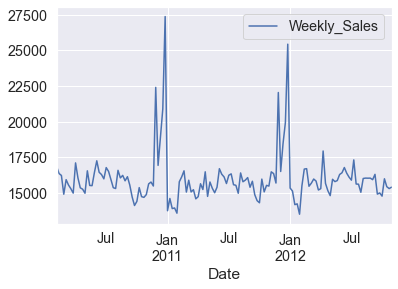

In [111]:
data1 = data[["Weekly_Sales"]]

#data1 = data1.reset_index() # to get the indexes back to 0, 1, 2,etc.
#data1.to_csv('C://Users//karth//Desktop//Timeseries_Task//data1.csv', encoding='utf-8' ,index=False)

data1.plot()

In [112]:
print(data1.head())
print(data1.shape)

            Weekly_Sales
Date                    
2010-02-07  16836.121997
2010-02-14  16352.056032
2010-02-21  16216.658979
2010-02-28  14899.549688
2010-03-07  15921.015727
(143, 1)


In [113]:
data1.tail()

,Weekly_Sales
Date,
2012-09-30,14765.327279
2012-10-07,15983.413747
2012-10-14,15427.596739
2012-10-21,15295.732397
2012-10-28,15391.725681


#### Multivariate Time Series

**A Multivariate TS is a time series with more than one time-dependent variable. Each variable depends on its past values but also has some dependency on other variables. This dependency is taken into account when predicting values. These variables can be endogenous or exogenous. I will be focusing on exogenous variables here.**

**An exogenous variable is one whose value is determined outside the model and is imposed on the model. In other words, variables that affect a model without being affected by it.**

In [114]:
#exo = data[["Store","Dept","MarkDown","Type_A","Type_B","Type_C"]] #considering only important features only to include exogenous variables 

# --------------OR-----------------

#data2 = data.loc[:, data.columns != 'Weekly_Sales'] #Selecting all features except target or predicted variable i.e., 'Weekly_Sales'

#data2.plot()


# --------------OR-----------------

exo = pd.read_csv(r"C://Users//karth//Desktop//Timeseries_Task//exog_withdiff_2.csv")
#exo = exo.set_index("DATE")
exo = exo.set_index("Date")

In [115]:
exo.head()

,vxncls_first_diff,wlemuindxd_first_diff,usepuindxd_first_diff,tedrate_first_diff,vixcls_first_diff,dgs10_first_diff,CCSA_first_diff,ICSA_first_diff
Date,,,,,,,,
2010-02-07,-1.664286,18.755238,-61.746667,-0.008571,-1.815714,0.097143,-23000.0,23000.0
2010-02-14,-1.664286,18.755238,-61.746667,-0.008571,-1.815714,0.097143,-23000.0,23000.0
2010-02-21,-2.957143,-7.604286,44.857143,0.004286,-3.238571,0.058571,-48000.0,11000.0
2010-02-28,-0.985714,-5.098571,-42.628571,-0.020000,-1.030000,-0.080000,-12000.0,-12000.0
2010-03-07,-1.594286,-6.881429,-12.641429,-0.018571,-1.721429,-0.017143,11000.0,-16000.0


In [116]:
exo.tail()

,vxncls_first_diff,wlemuindxd_first_diff,usepuindxd_first_diff,tedrate_first_diff,vixcls_first_diff,dgs10_first_diff,CCSA_first_diff,ICSA_first_diff
Date,,,,,,,,
2012-09-30,1.982857,-16.425714,-6.464286,-0.007143,1.394286,-0.125714,1000.0,-1000.0
2012-10-07,0.062857,63.507143,4.020000,-0.007143,-0.488571,0.025714,-14000.0,-26000.0
2012-10-14,1.260000,-75.935714,-27.602857,-0.018571,0.968571,0.015714,7000.0,36000.0
2012-10-21,0.378571,18.520000,73.192857,-0.012857,-0.001429,0.075714,-17000.0,-12000.0
2012-10-28,1.597143,-1.742857,-44.885714,-0.020000,1.937143,0.015714,-62000.0,-10000.0


In [117]:
print(exo.shape)

(143, 8)


In [118]:
#import statsmodels.api as sm

#exog = sm.add_constant(exo)

exog = exo

In [119]:
print(exog)

            vxncls_first_diff  wlemuindxd_first_diff  usepuindxd_first_diff  \
Date                                                                          
2010-02-07          -1.664286              18.755238             -61.746667   
2010-02-14          -1.664286              18.755238             -61.746667   
2010-02-21          -2.957143              -7.604286              44.857143   
2010-02-28          -0.985714              -5.098571             -42.628571   
2010-03-07          -1.594286              -6.881429             -12.641429   
...                       ...                    ...                    ...   
2012-09-30           1.982857             -16.425714              -6.464286   
2012-10-07           0.062857              63.507143               4.020000   
2012-10-14           1.260000             -75.935714             -27.602857   
2012-10-21           0.378571              18.520000              73.192857   
2012-10-28           1.597143              -1.742857

### Stationarity of Time Series

In order to use time series forecasting models, we need to ensure that our time series data is stationary i.e constant mean, constant variance and constant covariance with time.

There are 2 ways to test the stationarity of time series

**a)** Rolling Mean: Visualization **b)** Dicky - Fuller test: Statistical test

**a) Rolling Mean:** A rolling analysis of a time series model is often used to assess the model's stability over time. The window is rolled (slid across the data) on a weekly basis, in which the average is taken on a weekly basis. Rolling Statistics is a visualization test, where we can compare the original data with the rolled data and check if the data is stationary or not.

**b) Dicky -Fuller test:** This test provides us the statistical data such as p-value to understand whether we can reject the null hypothesis. The null hypothesis is that data is not stationary and the alternative hypothesis says that data is stationary. If p-value is less than the critical value (say 0.5), we will reject the null hypothesis and say that data is stationary.

1) **Trend:** change in the graph upward or downward with respect to time period.

2) **Seasonality:** for instance: sudden increase in the cost of product like pizza, ice creams etc,.

In order to apply ARIMA the data need to be stationary, In the sense the data should not be changed with respect to time.

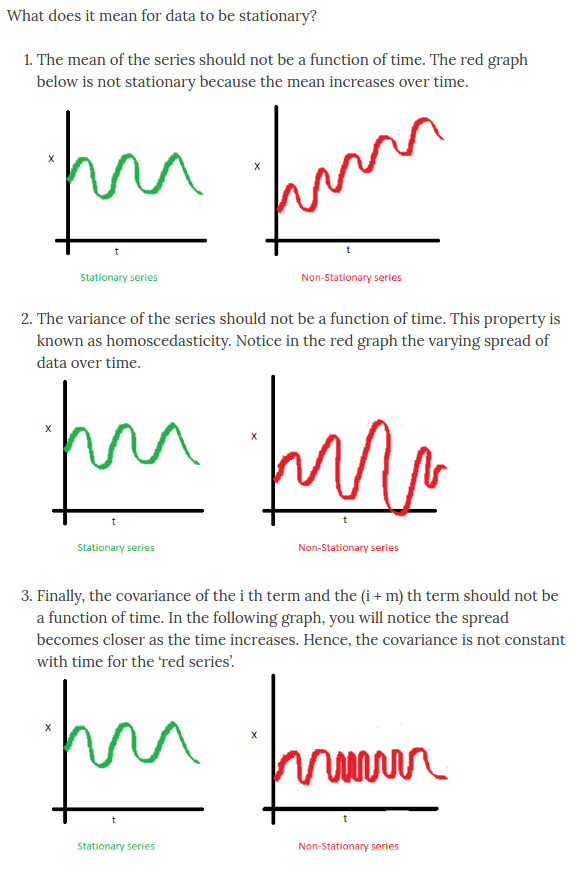

In [120]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\121.png')

If a time series is stationary and has a particular behaviour over a given time interval, then it is safe to assume that it will have same behaviour at some later point in time. Most statistical modelling methods assume or require the time series to be stationary.

#### What is variance?

Variance is a measurement of the spread between numbers in a data set. The variance measures how far each number in the set is from the mean. The square root of variance is the standard deviation.

### Checking whether data is Stationary or not using Dickey-Fuller test.

In [121]:
# Function to test the stationarity

# If the ‘Test Statistic’ is greater than the ‘Critical Value’ than the time series is stationary

from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('\nResults of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('\np-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('\np-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

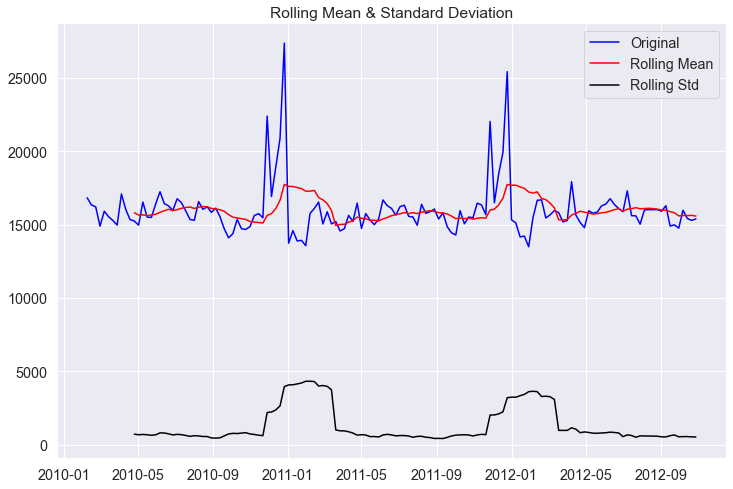


Results of Dickey-Fuller Test:

p-value = 0.0000. The series is likely stationary.
Test Statistic                -5.930803e+00
p-value                        2.383227e-07
#Lags Used                     4.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (1%)           -3.478648e+00
Critical Value (5%)           -2.882722e+00
Critical Value (10%)          -2.578065e+00
dtype: float64


In [122]:
# Testing stationarity

test_stationarity(data1)

#### **NOTE**

**If the p-value is less than 5%(significance level) or If the Test Static value is greater than than the Critical value than our data is stationary**

In [123]:
from scipy import stats
from scipy.stats import normaltest
def residual_plot(model):

    resid = model.resid
    print(normaltest(resid))
    
    # returns a 2-tuple of the chi-squared statistic, and the associated p-value. the p-value is very small, meaning
    # the residual is not a normal distribution

    fig = plt.figure(figsize=(12,8))
    ax0 = fig.add_subplot(111)

    sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats

    # Get the fitted parameters used by the function
    (mu, sigma) = stats.norm.fit(resid)

    #Now plot the distribution using 
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
    plt.ylabel('Frequency')
    plt.title('Residual distribution')

    # ACF and PACF
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(model.resid, lags=40, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(model.resid, lags=40, ax=ax2)

**We can see from the above plots and statistical tests that mean and variation doesn't change much with time, i.e they are constant. Thus, we don't need to perform any transformation (needed when time series is not stationary).**

### Let's check the trend and seasonality in our data.

Time series decomposition is the process of separating time series data into its core components. These components include a potential trend (overall rise or fall in the mean), seasonality (a recurring cycle), and the remaining random residual. Nearly all time series that you will come across are not n aturally stationary, meaning that the mean, variance, or covariance will be time dependent. This is why data scientists must identify and separate trends and seasonality from time series data before applying a model.

Seasonal decompose reduces the time series into diffirent time series who either product(multiplicative model) or sum(additive model) makes the original time series.

In [124]:
# Plotting seasonality and trend

from statsmodels.tsa.seasonal import seasonal_decompose

def plot_timeseries(sales):

    fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
    fig.set_figheight(10)
    fig.set_figwidth(15)

    decomposition= seasonal_decompose(sales, model = 'additive',period=30)

    estimated_trend = decomposition.trend
    estimated_seasonal = decomposition.seasonal
    estimated_residual = decomposition.resid
    
    axes[3].plot(data1['Weekly_Sales'],'y' ,label='Original')
    axes[3].legend(loc='upper left');
    
    axes[0].plot(estimated_trend, label='Trend')
    axes[0].legend(loc='upper left');
    
    axes[1].plot(estimated_seasonal, 'g', label='Seasonality')
    axes[1].legend(loc='upper left');
    
    axes[2].plot(estimated_residual, 'r',label='Residual')
    axes[2].legend(loc='upper left');

    plt.title('Decomposition Plots')

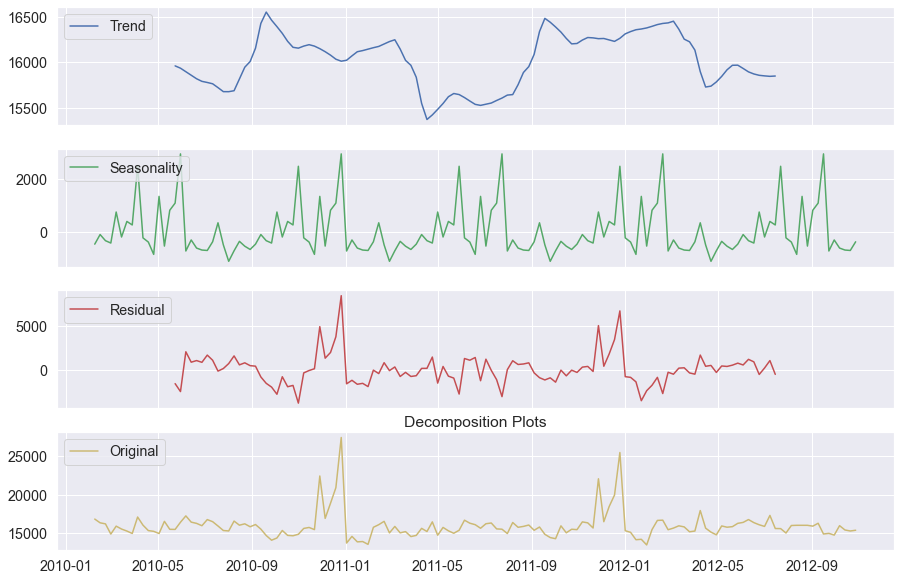

In [125]:
# Plotting seasonality and trend for store type 

plot_timeseries(data1['Weekly_Sales'])

From the above plots, we can see that there is seasonality present in our data. So, we'll use forecasting models that take both of these factors into consideration. For example, SARIMAX

As we can see from the graph, we are dealing with a seasonal Time Series. So I need to find the right parameters for the ARIMA Model as ARIMA(p,d,q)(P,D,Q)s. Here (p,d,q) are the non-seasonal parameter, while (P,D,Q) follow the same defintion, but are for the seasonal component of the series. The term s, is the periodicity (4 for the quarerly periods, 12 for yearly periods, etc.)

p is the auto-regressive part of the model. It allows us to incorporate the effect of past values into our model. Intuitively, this would be similar to stating that it is likely to be warm tomorrow if it has been warm the past 3 days.
d is the integrated part of the model. This includes terms in the model that incorporate the amount of differencing (i.e. the number of past time points to subtract from the current value) to apply to the time series. Intuitively, this would be similar to stating that it is likely to be same temperature tomorrow if the difference in temperature in the last three days has been very small.
q is the moving average part of the model. This allows us to set the error of our model as a linear combination of the error values observed at previous time points in the past.

### I am still making data more stationary

#### So now we need to transform the data to make it more stationary. There are various transformations you can do to stationarize the data. The first thing we want to do is take a first difference of the data. This should help to eliminate the overall trend from the data.

To get a stationary data, there's many techiniques. We can use log, differencing etc...

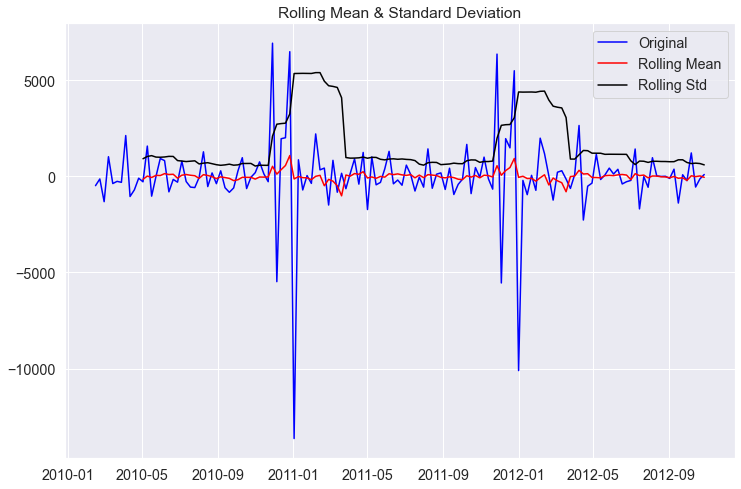


Results of Dickey-Fuller Test:

p-value = 0.0000. The series is likely stationary.
Test Statistic                -6.684617e+00
p-value                        4.256972e-09
#Lags Used                     7.000000e+00
Number of Observations Used    1.340000e+02
Critical Value (1%)           -3.480119e+00
Critical Value (5%)           -2.883362e+00
Critical Value (10%)          -2.578407e+00
dtype: float64


In [126]:
# This is for reducing trend and seasonality

first_diff = data1 - data1.shift(1) # Shifting by 1 i.e., t-1

first_diff = first_diff.dropna(inplace = False) # Dropping NaN values in our data

test_stationarity(first_diff, window = 12) # Checking stationarity of data

In [127]:
first_diff.head()

,Weekly_Sales
Date,
2010-02-14,-484.065965
2010-02-21,-135.397053
2010-02-28,-1317.109291
2010-03-07,1021.466039
2010-03-14,-374.165182


### We can use Log Scale Transformation from numpy package to transform time series into logarithmic scale.

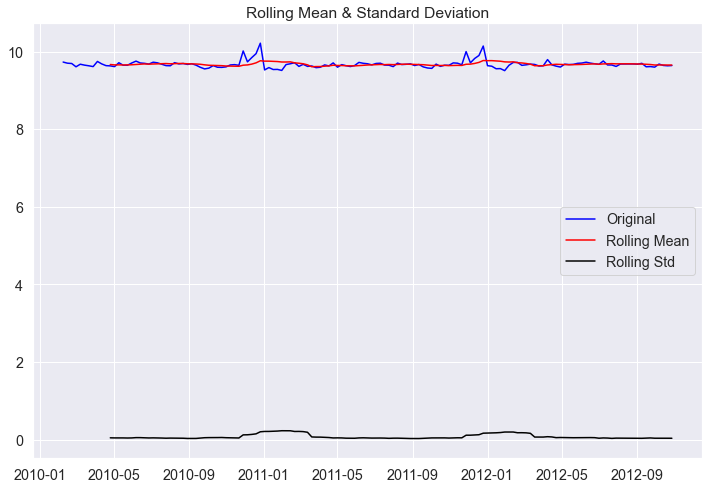


Results of Dickey-Fuller Test:

p-value = 0.0000. The series is likely stationary.
Test Statistic                -6.359255e+00
p-value                        2.497971e-08
#Lags Used                     4.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (1%)           -3.478648e+00
Critical Value (5%)           -2.882722e+00
Critical Value (10%)          -2.578065e+00
dtype: float64


In [128]:
data_logScale = np.log(data1.Weekly_Sales)
test_stationarity(data_logScale)

**From the logarithmic scale transformation, we can observe a smoother trend on the rolling mean and rolling standard deviation which suggests that time series is stationarity.**

#### Eliminating Seasonality & Trends

**Differencing :** This is specifically to remove the trend in the time series by differencing from the shifted version of same time series

**Decomposing :** It decomposes the time series into 3 parts such as Trends,Seasonality and Residual. We perform adfuller test on residual and if it's stationary we add trends and seasonality to the time series later after arima prediction

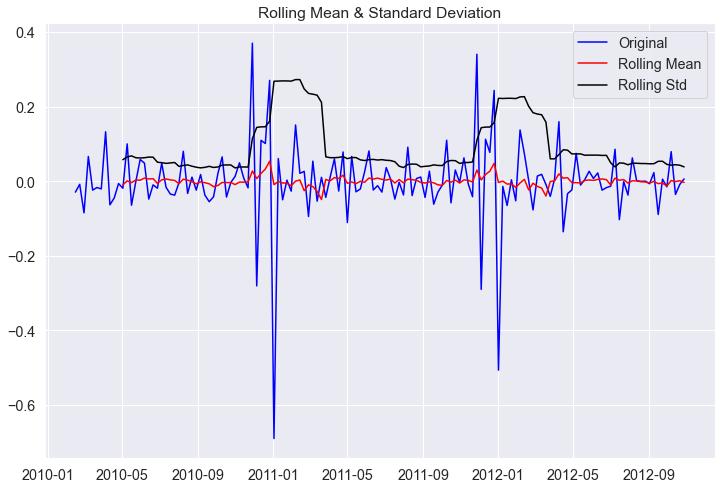


Results of Dickey-Fuller Test:

p-value = 0.0000. The series is likely stationary.
Test Statistic                -6.737690e+00
p-value                        3.176666e-09
#Lags Used                     7.000000e+00
Number of Observations Used    1.340000e+02
Critical Value (1%)           -3.480119e+00
Critical Value (5%)           -2.883362e+00
Critical Value (10%)          -2.578407e+00
dtype: float64


In [129]:
data_logScale_1stdiff = data_logScale - data_logScale.shift(1)
data_logScale_1stdiff = data_logScale_1stdiff.dropna(inplace=False)
test_stationarity(data_logScale_1stdiff)

**For more data transformations this is good resourse https://github.com/DataForScience/Timeseries

### Evaluation Metrics

There are two popular metrics used in measuring the performance of regression (continuous variable) models i.e MAE & RMSE.

**MAE** - Mean Absolute Error: It is the average of the absolute difference between the predicted values and observed values.

**RMSE** - Root Mean Square Error: It is the square root of the average of squared differences between the predicted values and observed values.

MAE is easier to understand and interpret but RMSE works well in situations where large errors are undesirable. This is because the errors are squared before they are averaged, thus penalizing large errors. In our case, RMSE suits well because we want to predict the sales with minimum error (i.e penalize high errors) so that inventory can be managed properly.

So, let's choose **RMSE as a metric to measure the performance of our models.**

### Model 1 - ARIMA (Autoregressive Integrated Moving Average)

In order to use this model, we need to first find out values of p, d and q. p represents number of Autoregressive terms - lags of dependent variable. q represents number of Moving Average terms - lagged forecast errors in prediction equation. d represents number of non-seasonal differences.

To find the values of p, d and q - we use Autocorrelation function (ACF) and Partial Autocorrelation (PACF) plots.

**ACF**(Auto Corelation Function) - measure of correlation between time series with a lagged version of itself. 

**PACF**(Partial Auto Corelation Function) - measure of correlation between time series with a lagged version of itself but after eliminating the variations already explained by the intervening comparison.

p value is the value on x-axis of PACF where the plot crosses the upper Confidence Interval for the first time. q value is the value on x-axis of ACF where the plot crosses the upper Confidence Interval for the first time.

Now, let's plot these graphs.

**PACF- AR model**

**ACF- MA model**

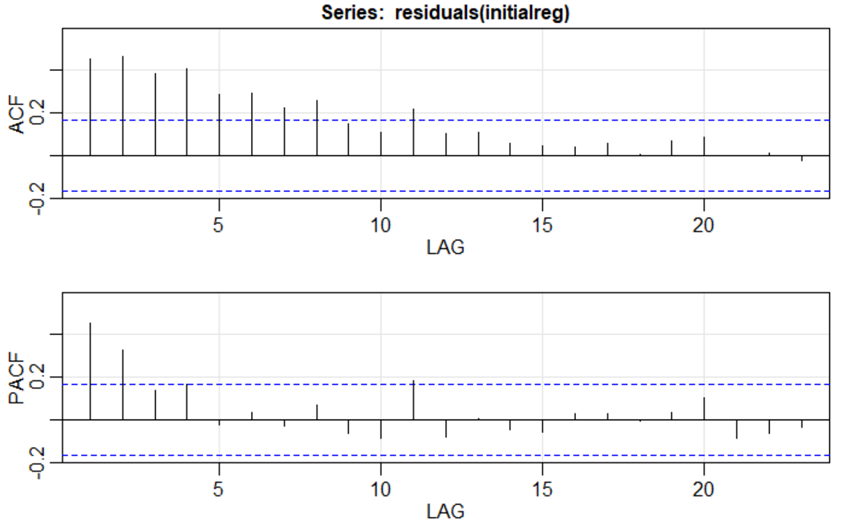

In [130]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\131.png')

By the above images we can observe that, the lines which crosses the blue dotted lines in PACF and ACF those lines are considered to be that many days are required to predict the todays value. For example in above PACF plot that has only three lines which crossed the blue dotted lines so last three days values are required to predict the todays value, similarly ACF plot also but for model we should not consider ACF-MA model because many lines crossed the blue threshold line, so it will create the model complex. So we should select only PACF-AR model to predict

In [131]:
# Autocorrelation function to make ACF and PACF graphs
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
from statsmodels.tsa.stattools import acf,pacf

def auto_corr(sales):
    lag_acf = acf(sales,nlags=30)
    lag_pacf = pacf(sales,nlags=20,method='ols')
  
    plt.subplot(121)
    plt.plot(lag_acf)
    plt.axhline(y=0,linestyle='--',color ='red')
    plt.axhline(y=1.96/np.sqrt(len(sales)),linestyle='--',color ='red')
    plt.axhline(y=-1.96/np.sqrt(len(sales)),linestyle='--',color ='red')
    plt.title('ACF')
    
    plt.subplot(122)
    plt.plot(lag_pacf)
    plt.axhline(y=0,linestyle='--',color ='red')
    plt.axhline(y=1.96/np.sqrt(len(sales)),linestyle='--',color ='red')
    plt.axhline(y=-1.96/np.sqrt(len(sales)),linestyle='--',color ='red')
    plt.title('PACF')

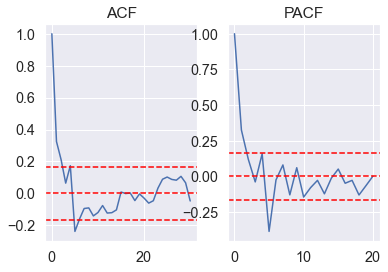

In [132]:
# ACF and PACF 

auto_corr(data1)

We notice that in ACF graph p = 1 (it is where it crosses the positive lag) and q = 1 (it is where pacf crosses the positive lag of)

#### ------------------------------OR------------------------------------

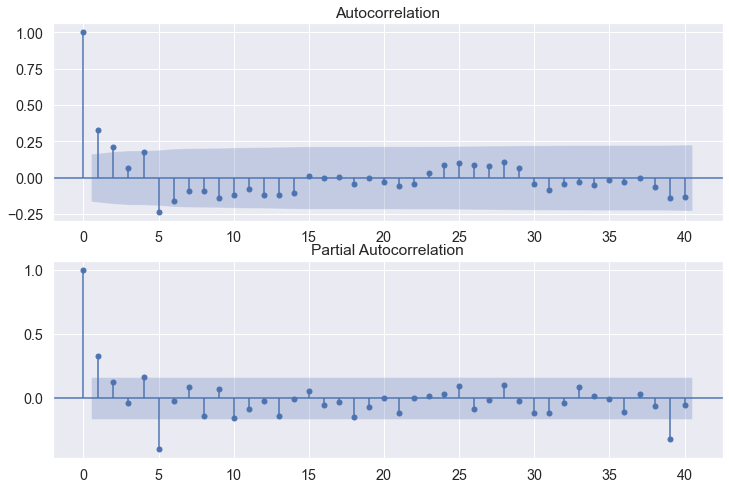

In [133]:
import statsmodels.api as sm
# Autocorrelation function to make ACF and PACF graphs
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
from statsmodels.tsa.stattools import acf,pacf

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data1.Weekly_Sales, lags=40, ax=ax1)  
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data1.Weekly_Sales, lags=40, ax=ax2)      #lags=40

#### How to determin p, d, q

In our case, we see the first order differencing make the ts stationary. d = 1.

In our case, it's clearly that within 6 lags the AR is significant. Which means, we can use AR = 6 (6 lines are crossed the blue lines so 6past days are required to predict)

To avoid the potential for incorrectly specifying the MA order (in the case where the MA is first tried then the MA order is being set to 0) then 1, then 2, it may often make sense to extend the lag observed from the last significant term in the PACF.

From above graphs its hard to find p,q but let's do a grid search and see which combination of p, q and d gives the lowest Akaike information criterion (AIC, which tells us the quality of statistical models for a given set of data. Best model uses the lowest number of features to fit the data.

In [134]:
import warnings
import statsmodels.api as sm

warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',FutureWarning)

arima_model = sm.tsa.ARIMA(data1, (1,1,1)).fit(disp=False)

print(arima_model.summary())

                             ARIMA Model Results                              
Dep. Variable:         D.Weekly_Sales   No. Observations:                  142
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1258.870
Method:                       css-mle   S.D. of innovations           1687.961
Date:                Tue, 15 Jun 2021   AIC                           2525.740
Time:                        16:11:28   BIC                           2537.563
Sample:                    02-14-2010   HQIC                          2530.544
                         - 10-28-2012                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.6029      5.071     -0.119      0.905     -10.541       9.335
ar.L1.D.Weekly_Sales     0.3325      0.080      4.175      0.000       0.176       0.489
ma.L1.D.Week

#### Analyze the result

To see how our first model perform, we can plot the residual distribution. See if it's normal dist. And the ACF and PACF. For a good model, we want to see the residual is normal distribution. And ACF, PACF has not significant terms.

NormaltestResult(statistic=106.09662699281431, pvalue=9.149769936779314e-24)


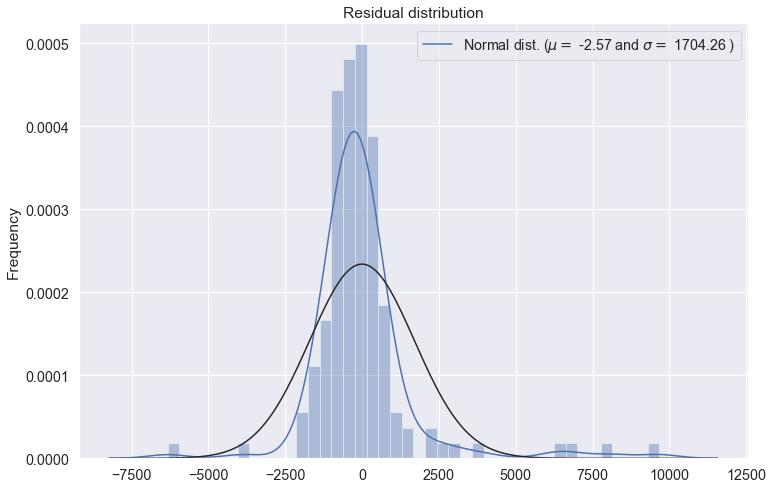

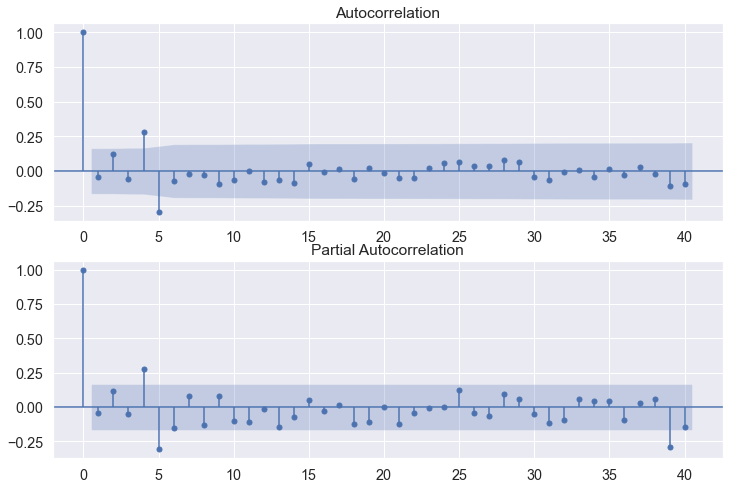

In [135]:
residual_plot(arima_model)

Although the graph looks very like a normal distribution. But it failed the test. Also we see a recurring correlation exists in both ACF and PACF. So we need to deal with seasonality.

When the plots of ACF and PACF are similar or any sesaonality is present between them than we need to apply SARIMA model, which it is extended model of ARIMA

#### What is SARIMA and what is the use of it ?

ARIMA, is one of the most widely used forecasting methods for univariate time series data forecasting, but it does not support time series with a seasonal component. The ARIMA model is extended (SARIMA) to support the seasonal component of the series. SARIMA (Seasonal Autoregressive Integrated Moving Average), method for time series forecasting is used on univariate data containing trends and seasonality. SARIMA is composed of trend and seasonal elements of the series.

Some of the parameters that are same as ARIMA model are: p: Trend autoregression order. d: Trend difference order. q: Trend moving average order There are four seasonal elements that are not part of ARIMA are: P: Seasonal autoregressive order. D: Seasonal difference order. Q: Seasonal moving average order. m: The number of time steps for a single seasonal period. Thus SARIMA model can be specified as: SARIMA (p, d, q) (P,D,Q) m

If m is 12, it specifies monthly data suggests a yearly seasonal cycle. SARIMA time series models can also be combined with spatial and event based models to yield ensemble models that solves multi-dimensional ML problems. Such a ML model can be designed to predict cell load in cellular networks at different times of the day round the year as illustrated below in the sample figure Autocorrelation, trend, and seasonality (weekday , weekend effects) from time series analysis can be used to interpret temporal influence. Regional and cell wise load distribution can be used to predict sparse and over loaded cells in varying intervals of time. Events (holidays, special mass gatherings and others) can be predicted using decision trees.

### Auto ARIMA

In [136]:
#!pip install pmdarima

In [137]:
import warnings
import statsmodels.api as sm
import pmdarima as pm

model = pm.auto_arima(data1,
                        m=12, seasonal=True,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2550.144, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2537.750, Time=0.24 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2541.785, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3177.740, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2536.279, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=2537.489, Time=0.03 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=2536.269, Time=0.02 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=2537.851, Time=0.22 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=2537.735, Time=0.09 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=2538.070, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=2538.230, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept

In [138]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1264.134
Date:                Tue, 15 Jun 2021   AIC                           2536.269
Time:                        16:11:33   BIC                           2548.120
Sample:                             0   HQIC                          2541.085
                                - 143                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9491.2828   1171.277      8.103      0.000    7195.622    1.18e+04
ar.L1          0.2863      0.049      5.823      0.000       0.190       0.383
ar.L2          0.1196      0.081      1.485      0.137      -0.038       0.277
sigma2      2.824e+06   1.68e+05     16.829      0.000     2.5e+06    3.15e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1224.13
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.57   Skew:                             2.58
Prob(H) (two-sided):                  0.06   Kurtosis:                        16.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [139]:
auto_arima = model.fit(data1,disp=False)

In [140]:
print(auto_arima.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9491.2828   1171.277      8.103      0.000    7195.622    1.18e+04
ar.L1          0.2863      0.049      5.823      0.000       0.190       0.383
ar.L2          0.1196      0.081      1.485      0.137      -0.038       0.277
sigma2      2.824e+06   1.68e+05     16.829      0.000     2.5e+06    3.15e+06


### Model - 2 SARIMA (Seasonal Autoregressive Integrated Moving Average)

### Hyperparamter tuning ARIMA model

As discussed above, we have three parameters (p, d and q) for SARIMA model. So, in order to choose the best combination of these parameter, we'll use a grid search. The best combination of parameters will give the lowest AIC score.

In [141]:
import itertools

# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA: ')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA: 
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


**Now, let's iterate through these combinations to see which one gives the lowest AIC score.**

In [142]:
#data1.index = pd.DatetimeIndex(data1.index.values,freq=data1.index.inferred_freq)

In [143]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import  ARIMA

# Determing p,d,q combinations with AIC scores.

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data1, # variables to be predicted i.e., Weekly Sales
                                            order = param,
                                            exog = exog, # exogenous variables
                                            seasonal_order = param_seasonal,
                                            enforce_stationarity = False,
                                            enforce_invertibility = False)
            results = mod.fit(maxiter=200) #
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3721.7477000819144
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2821.823469835957
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2938.691377987294


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2188.4162677325153


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2645.4227741157856


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2584.9749830093638
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2190.2046848962523


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2178.3243360417714
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3058.904798349018


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2776.2776272038486


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2404.8593128718194


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2159.955624936885
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2801.141910880312


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2757.7191516836633


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2189.5049082969467


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2154.619560562717
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:3120.827973563448


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2357.7656906628254
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2937.466954802815


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:2161.700125446913


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:2374.584026469579
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:2359.755833289463

C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:2203.3027158351465


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:2163.1942528951176


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:2513.320056170931


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2309.7374594717694
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:2391.495440935384


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:2134.4736574663207


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:2345.104282433321


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2312.153069202953


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:2181.5982528158843


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:2135.915860498156


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:2853.791972517299


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:2618.5878196392714


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:2416.0271303406853


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:2167.8650960322066


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:2618.5957960222954


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:2619.187407982104


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:2166.952818419406


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:2166.643213045991
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:2782.700435105809


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2548.902772961002


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:2396.2325530869784


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:2147.303982833916


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:2568.0465928655835


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2551.4641132016877


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:2167.596790561198


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:2147.6199568634556


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:2539.7155710707784
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:2336.163634083594


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:2414.398957293378


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:2157.7524449267535
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:2336.116417495665


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:2337.504776314916


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:2166.9506306260396


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:2159.2260416091467


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:2506.033014993324


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2298.163512769812


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:2391.4567278641007


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:2129.486332091917


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:2315.517447773971


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2299.696552429122


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:2161.9117164403297


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:2131.3705445396495


#### ------------------OR----------------------

In [144]:
# parameters = []
# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(data1, # variables to be predicted i.e., Weekly Sales
#                                             order = param,
#                                             exog = exog, # exogenous variables
#                                             seasonal_order = param_seasonal,
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False)

#             results = mod.fit(maxiter=200) # 
#             #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
#         except:
#             continue
#         aic = results.aic
#         parameters.append([param,param_seasonal,aic])

# result_table = pd.DataFrame(parameters)
# result_table.columns = ['parameters','parameters_seasonal','aic']
# result_table = result_table.sort_values(by='aic',ascending = True).reset_index(drop = True)
# minimum = result_table['aic'].min()
# a = result_table.loc[result_table['aic'] == minimum]
# print('The best combination that gives the lowest AIC is: ')
# print(a)

In [145]:
#result_table.sort_values(by='aic').head(10)

In [146]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                       Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1052.685
Date:                            Tue, 15 Jun 2021   AIC                           2131.371
Time:                                    16:12:23   BIC                           2167.167
Sample:                                02-07-2010   HQIC                          2145.902
                                     - 10-28-2012                                         
Covariance Type:                              opg                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
vxncls_first_diff      -656.1087    588.916     -1.114      0.265   -1810.363     498.145
wl

    Lets focus only on coef. This column shows the importance (weight) of each feature and how each one impacts the time series.

    The P>|z| column informs us of the significance of each feature. Here, each weight has a p-value higher then 0

**We can see from the above grid search that our optimal parameter combination is SARIMAX(1, 1, 1)x(1, 1, 1, 12) - AIC:2133.396. So, let's use this in our model.**

In [147]:
data.tail(7)

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,isHoliday,Month,Year,Day,Week_Number,Quarter,MarkDown,Type_A,Type_B,Type_C,Season_Spring,Season_Winter
Date,,,,,,,,,,,,,,,,,,,,
2012-09-16,22.277048,44.432760,14905.978648,136570.707449,69.785612,3.853854,175.773200,7.225750,0.0,9.0,2012.0,14.0,37.0,3.0,14980.987931,0.511965,0.385238,0.102797,1.0,0.0
2012-09-23,22.230821,44.285231,14989.708385,136402.997972,67.395566,3.910709,175.753095,7.225871,0.0,9.0,2012.0,21.0,38.0,3.0,14975.103633,0.508956,0.388307,0.102737,1.0,0.0
2012-09-30,22.237002,44.154288,14765.327279,136009.082039,68.151759,3.858245,175.919639,7.225855,0.0,9.0,2012.0,28.0,39.0,3.0,10858.516293,0.508103,0.387576,0.104321,1.0,0.0
2012-10-07,22.276882,44.512097,15983.413747,136334.755712,65.456811,3.848435,175.998254,6.942141,0.0,10.0,2012.0,5.0,40.0,4.0,11486.792345,0.511761,0.385081,0.103159,1.0,0.0
2012-10-14,22.225084,44.605686,15427.596739,136228.789298,57.687284,3.897425,176.123786,6.952682,0.0,10.0,2012.0,12.0,41.0,4.0,8138.880906,0.509365,0.387291,0.103344,1.0,0.0
2012-10-21,22.247458,44.154237,15295.732397,135892.584068,60.152756,3.878413,176.295499,6.948928,0.0,10.0,2012.0,19.0,42.0,4.0,5667.852210,0.505085,0.389831,0.105085,1.0,0.0
2012-10-28,22.266982,44.183508,15391.725681,136113.406218,60.530277,3.791086,176.182886,6.943212,0.0,10.0,2012.0,26.0,43.0,4.0,7596.107073,0.507266,0.387969,0.104765,1.0,0.0


In [148]:
#train = data[(data.index.get_level_values(0) >= '2013-01-06') & (data.index.get_level_values(0) <= '2015-06-21')]
#test = data[(data.index.get_level_values(0) > '2015-06-21')]

##---------------------OR---------------------
#train_ind = int(len(data)*0.8)

#train = data[:train_ind]
#test = data[train_ind:]

##---------------------OR---------------------

train = data.iloc[:-6]
test = data.iloc[-6:]

In [149]:
test

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,isHoliday,Month,Year,Day,Week_Number,Quarter,MarkDown,Type_A,Type_B,Type_C,Season_Spring,Season_Winter
Date,,,,,,,,,,,,,,,,,,,,
2012-09-23,22.230821,44.285231,14989.708385,136402.997972,67.395566,3.910709,175.753095,7.225871,0.0,9.0,2012.0,21.0,38.0,3.0,14975.103633,0.508956,0.388307,0.102737,1.0,0.0
2012-09-30,22.237002,44.154288,14765.327279,136009.082039,68.151759,3.858245,175.919639,7.225855,0.0,9.0,2012.0,28.0,39.0,3.0,10858.516293,0.508103,0.387576,0.104321,1.0,0.0
2012-10-07,22.276882,44.512097,15983.413747,136334.755712,65.456811,3.848435,175.998254,6.942141,0.0,10.0,2012.0,5.0,40.0,4.0,11486.792345,0.511761,0.385081,0.103159,1.0,0.0
2012-10-14,22.225084,44.605686,15427.596739,136228.789298,57.687284,3.897425,176.123786,6.952682,0.0,10.0,2012.0,12.0,41.0,4.0,8138.880906,0.509365,0.387291,0.103344,1.0,0.0
2012-10-21,22.247458,44.154237,15295.732397,135892.584068,60.152756,3.878413,176.295499,6.948928,0.0,10.0,2012.0,19.0,42.0,4.0,5667.852210,0.505085,0.389831,0.105085,1.0,0.0
2012-10-28,22.266982,44.183508,15391.725681,136113.406218,60.530277,3.791086,176.182886,6.943212,0.0,10.0,2012.0,26.0,43.0,4.0,7596.107073,0.507266,0.387969,0.104765,1.0,0.0


In [150]:
train.shape

(137, 20)

In [151]:
test.shape

(6, 20)

In [152]:
exog.shape

(143, 8)

### Fitting the model - using hyperparamters tuned above

In [153]:
model = ARIMA(train['Weekly_Sales'],order=(1, 1, 1))# # disp=False

model = mod.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1052.685
Date:                            Tue, 15 Jun 2021   AIC                           2131.371
Time:                                    16:12:38   BIC                           2167.167
Sample:                                02-07-2010   HQIC                          2145.902
                                     - 10-28-2012                                         
Covariance Type:                              opg                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
vxncls_first_diff      -656.1087    588.916     -1.114      0.265   -1810.363     498.145
wlemuindxd_first_diff     0.6981      8.942      0.078      0.938     -16.828      18.225
usepuindxd_first_diff    -8.3917     11.128     -0.754      0.451     -30.202      13.419
tedrate_first_diff     8100.8473   2.41e+04      0.337      0.736   -3.91e+04    5.53e+04
vixcls_first_diff       600.2989    584.977      1.026      0.305    -546.234    1746.832
dgs10_first_diff      -1352.5622   5061.869     -0.267      0.789   -1.13e+04    8568.519
CCSA_first_diff          -0.0004      0.007     -0.064      0.949      -0.013       0.012
ICSA_first_diff           0.0148      0.021      0.696      0.486      -0.027       0.056
ar.L1                     0.4354      0.189      2.300      0.021       0.064       0.806
ma.L1                    -0.9761      0.191     -5.101      0.000      -1.351      -0.601
ar.S.L12                 -0.0403      0.225     -0.179      0.858      -0.482       0.401
ma.S.L12                 -0.7199      0.161     -4.477      0.000      -1.035      -0.405
sigma2                 6.691e+06    119.025   5.62e+04      0.000    6.69e+06    6.69e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):               302.37
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               0.18   Skew:                             1.57
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.78e+20. Standard errors may be unstable.
"""

### Model Prediction and validation

In [154]:
start = len(train)
end = len(train) + len(test) - 1

pred = model.predict(start = start, end = end, typ = 'levels',exog = exog)
#pred = np.exp(pred)

In [155]:
print(pred)

2012-09-23    16106.536228
2012-09-30    15343.313692
2012-10-07    14098.405582
2012-10-14    16502.147744
2012-10-21    14492.122476
2012-10-28    17646.903503
Freq: W-SUN, Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='Date'>

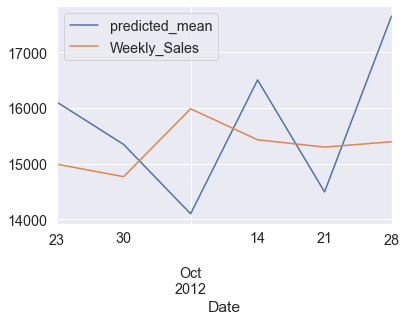

In [156]:
pred.plot(legend = True)
test['Weekly_Sales'].plot(legend = True)

In [161]:
# # Visualization
# plt.figure(figsize=(10,6))
# plt.plot(data1.index, data1["Weekly_Sales"], label="Training Data")
# plt.plot(pred.index, pred, label="Prediction", color="red")
# plt.legend()

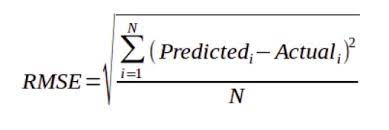

In [162]:
from IPython.display import Image
Image(filename=r'C:\Users\karth\Desktop\ML_Task\1000.jpg')

In [163]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(pred,test['Weekly_Sales']))
print("Root Mean Square Error:",rmse)

Root Mean Square Error: 1415.4448229240402


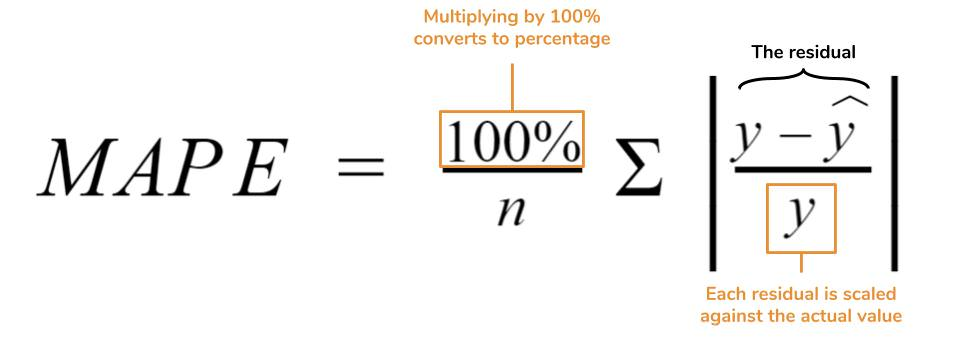

In [164]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\800.jpg')

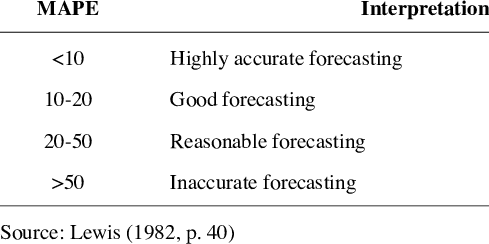

In [165]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\2000.png')

In [166]:
# creating the mean absolute percentage error

def mean_absolute_percentage_error(truth, forecasted): 
    truth, forecasted = np.array(test['Weekly_Sales']), np.array(pred)
    return np.mean(np.abs((test['Weekly_Sales'] - pred) / test['Weekly_Sales'])) * 100

# Calculating the error

mape = mean_absolute_percentage_error(test['Weekly_Sales'], pred)
print("Mean Absolute Percentage Error: ", mape)

Mean Absolute Percentage Error:  8.33824439065185


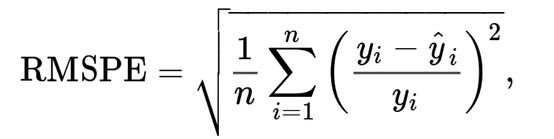

In [167]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\900.jpg')

In [168]:
# creating the root mean square percentage error

def root_mean_square_percentage_error(truth, forecasted):
    truth, forecasted = np.array(test['Weekly_Sales']), np.array(pred)
    return np.sqrt(np.mean(np.square(((test['Weekly_Sales'] - pred) / test['Weekly_Sales']) )))* 100

# Calculating the error

rmspe = root_mean_square_percentage_error(test['Weekly_Sales'], pred)
print("Root Mean Square Percentage Error", rmspe)

Root Mean Square Percentage Error 9.135239484003357


#### **Evaluating a Forecast**

**There are a number of widely accepted forecasting metrics and a bit of debate about what to use and when. The most common one is forecast error and is given as:**

In [1]:
from IPython.display import Image
Image(filename=r'C:\Users\karth\Desktop\ML_Task\1a.jpg')

**So if you predict 12 and sell 10, you have an error of -2.**

**If you want to compare the forecast for all of your SKU's, you can also use metrics like mean absolute error (MAE) or root mean squared error (RMSE).**

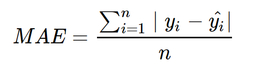

In [2]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\2a.jpg')

**MAE is the absolute value of the error, summed for each SKU and divided by the total number of SKU's,  n .**

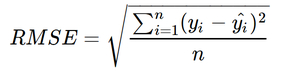

In [3]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\3a.jpg')

**RMSE is similar, however rather than the absolute value, the error is squared before it is summed, and then the square root is taken to normalize the units. Because we take the square of the error, we wind up punishing large forecasting errors more than small ones. Notice too that all of these are scale-dependent metrics meaning that you can't use them to compare forecasts on different scales.
There are a few percentage error metrics that we can look at as well. First being mean absolute percentage error (MAPE).**

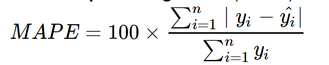

In [4]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\4a.jpg')

**This is a scale-independent metric and can be used for meaningful comparisons. It does have a few drawbacks, for one, negative errors are penalized more heavily. The calculation of any percentage error can also be unstable when dividing by small numbers. It also requires some sort of absolute scale to be used for 0 to be meaningful, which is usually the case in supply chain, but may not be for other forecasts such as temperature.
Often times MAPE will be defined as:**

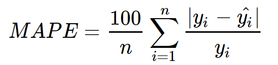

In [5]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\5a.jpg')

**Personally, I'm not a fan of this latter definition because it requires the summing of percentages which are then averaged. Mathematically speaking, simply adding percentages together is a bit dicey, so I tend to use the former definition.
There's one other metric to be aware of, and that is the weighted MAPE (wMAPE). Where  w  represents a weighting of your choosing.**

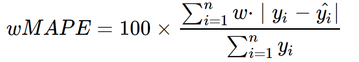

In [6]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\6a.jpg')

**This is one of the better demand forecasting metrics, particularly if you are trying to find a single number that is relevant for a number of SKU's because it allows you the opportunity to tie the forecast back to the value it provides for your business. For example, I like to weight my forecasts according to the margin that the product provides so that you are punished more for mistakes with higher margin products rather than low margin products. You could also develop a customer segmentation weighting or whatever approach that helps to best capture the value to your business.
Because the weighting is subjective and I haven't made any distinguishment between different products, customers, or anything else**

In [169]:
data.tail()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,isHoliday,Month,Year,Day,Week_Number,Quarter,MarkDown,Type_A,Type_B,Type_C,Season_Spring,Season_Winter
Date,,,,,,,,,,,,,,,,,,,,
2012-09-30,22.237002,44.154288,14765.327279,136009.082039,68.151759,3.858245,175.919639,7.225855,0.0,9.0,2012.0,28.0,39.0,3.0,10858.516293,0.508103,0.387576,0.104321,1.0,0.0
2012-10-07,22.276882,44.512097,15983.413747,136334.755712,65.456811,3.848435,175.998254,6.942141,0.0,10.0,2012.0,5.0,40.0,4.0,11486.792345,0.511761,0.385081,0.103159,1.0,0.0
2012-10-14,22.225084,44.605686,15427.596739,136228.789298,57.687284,3.897425,176.123786,6.952682,0.0,10.0,2012.0,12.0,41.0,4.0,8138.880906,0.509365,0.387291,0.103344,1.0,0.0
2012-10-21,22.247458,44.154237,15295.732397,135892.584068,60.152756,3.878413,176.295499,6.948928,0.0,10.0,2012.0,19.0,42.0,4.0,5667.852210,0.505085,0.389831,0.105085,1.0,0.0
2012-10-28,22.266982,44.183508,15391.725681,136113.406218,60.530277,3.791086,176.182886,6.943212,0.0,10.0,2012.0,26.0,43.0,4.0,7596.107073,0.507266,0.387969,0.104765,1.0,0.0


In [170]:
forecast_range = pd.date_range(start='2012-10-28', periods=6,freq='W') 

pred = model.predict(start = len(data), end = len(data) + 5 ,typ = 'levels',exog = exog[137:],dynamic = True).rename('ARIMA Predictions')
#print(pred)
pred.index = forecast_range
print(pred)

2012-10-28    14710.985463
2012-11-04    15117.267736
2012-11-11    15290.594843
2012-11-18    17456.242980
2012-11-25    14387.916707
2012-12-02    15576.937104
Freq: W-SUN, Name: ARIMA Predictions, dtype: float64


In [171]:
pred.shape

(6,)

In [172]:
forecast_range = pd.date_range(start='2012-10-28', periods=6,freq='W')
forecast_range

DatetimeIndex(['2012-10-28', '2012-11-04', '2012-11-11', '2012-11-18',
               '2012-11-25', '2012-12-02'],
              dtype='datetime64[ns]', freq='W-SUN')

In [173]:
forecast1_df = pd.DataFrame(pred, index = forecast_range,columns=['Prediction'])

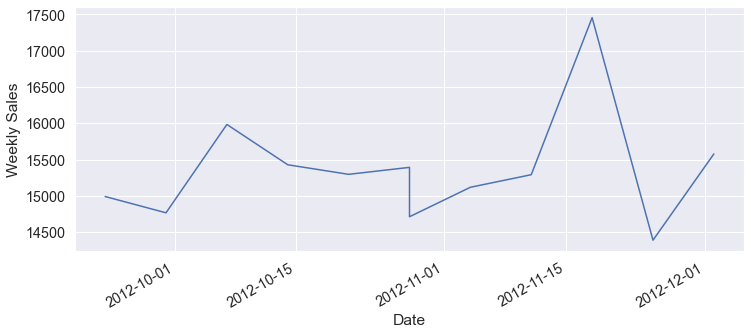

In [174]:
out = pd.concat([test['Weekly_Sales'],pred]) #,axis=1
out.plot(figsize = (12,5),legend = False)
plt.xlabel("Date")
plt.ylabel("Weekly Sales")

plt.legend
plt.show()

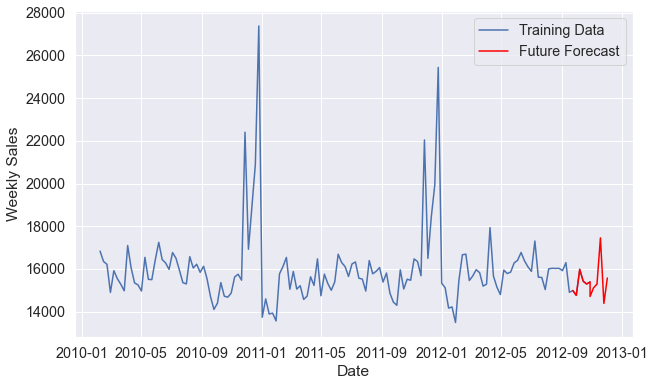

In [175]:
# Visualization
plt.figure(figsize=(10,6))
plt.plot(data1.index, data1["Weekly_Sales"], label="Training Data")
plt.plot(out.index, out, label="Future Forecast", color="red")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()

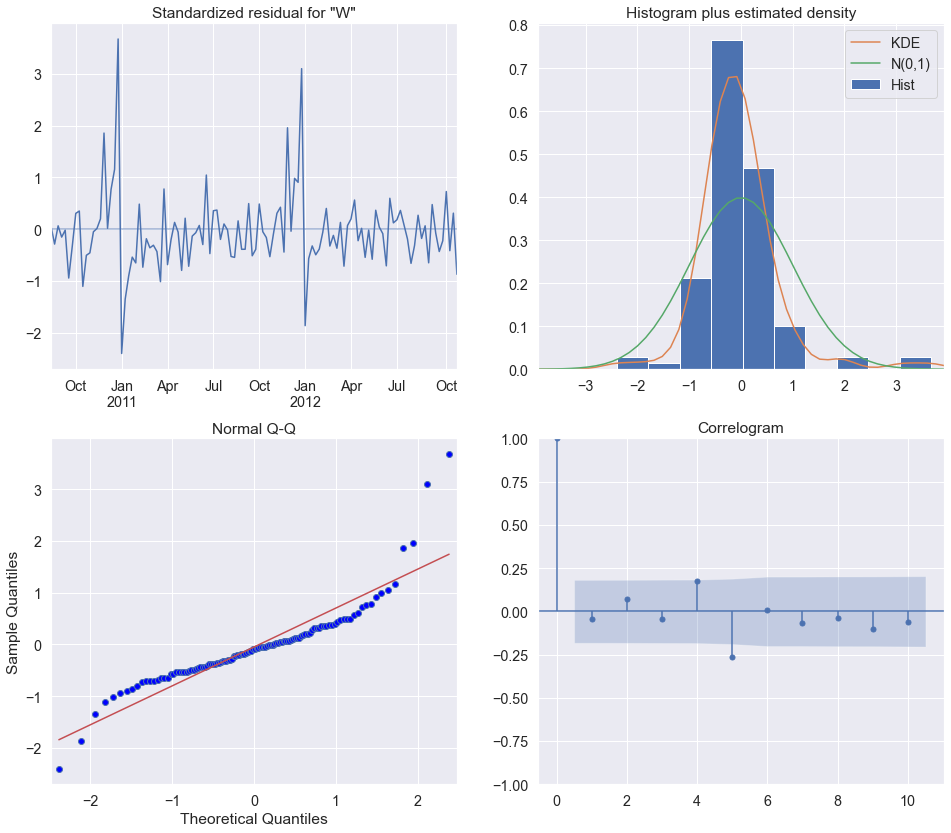

In [176]:
model.plot_diagnostics(figsize=(16, 14))
plt.show()

Our primary concern is to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved.

In this case, our model diagnostics suggests that the model residuals are normally distributed based on the following:

    In the top right plot, we see that the red KDE line don't follows closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed.
    
    The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.
    
    The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

In [177]:
print(test.shape,pred.shape)

(6, 20) (6,)


In [178]:
rmse = sqrt(mean_squared_error(pred,test['Weekly_Sales']))
print("Root Mean Square Error:",rmse)

Root Mean Square Error: 970.8574178958675


In [179]:
# creating the mean absolute percentage error

def mean_absolute_percentage_error(truth, forecasted): 
    truth, forecasted = np.array(test['Weekly_Sales']), np.array(pred)
    return np.mean(np.abs((test['Weekly_Sales'] - pred) / test['Weekly_Sales'])) * 100

# Calculating the error

mape = mean_absolute_percentage_error(test['Weekly_Sales'], pred)
print("Mean Absolute Percentage Error: ", mape)

Mean Absolute Percentage Error:  4.422767350506971


In [180]:
# creating the root mean square percentage error

def root_mean_square_percentage_error(truth, forecasted):
    truth, forecasted = np.array(test['Weekly_Sales']), np.array(pred)
    return np.sqrt(np.mean(np.square(((test['Weekly_Sales'] - pred) / test['Weekly_Sales']) )))* 100

# Calculating the error

rmspe = root_mean_square_percentage_error(test['Weekly_Sales'], pred)
print("Root Mean Square Percentage Error", rmspe)

Root Mean Square Percentage Error 4.422767350506971
